Useful Captum Resources:

https://captum.ai/api/utilities.html

https://captum.ai/api/guided_grad_cam.html

https://github.com/pytorch/captum

In [1]:
#Imports
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
from multiprocessing import Pool


import torchvision
from torchvision import models as tvmodels
from torchsummary import summary

import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset, Dataset

import torchvision.models as torchvisionmodels

import os
import numpy as np
import cv2
import argparse
import sys

import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import itertools
import more_itertools

import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt

from captum.attr import LayerGradCam
from captum.attr import visualization
from PIL import Image
import shutil

import numpy as np
from dask_image.imread import imread
from dask_image import ndfilters, ndmorph, ndmeasure
import matplotlib.pyplot as plt
from dask_image import ndmeasure

from operator import itemgetter

In [2]:
from model import resnet
from model.utils import load_filtered_state_dict, SaveBestModel, AverageMeter, accuracy
model = resnet.ResNet(torchvision.models.resnet.Bottleneck, [3, 4, 6, 3], 2)
checkpoint = torch.load('self_harm-pytorch/models/self_harm/epoch_21.pkl')
load_filtered_state_dict(model, checkpoint, ignore_layer=[], reverse=True)
transform_test = transforms.Compose([transforms.Resize(320),
        transforms.RandomCrop(299), transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

good_img_transform = transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))

device = 'cuda' if torch.cuda.is_available() else 'cpu'

classes = {0:'non_self_harm', 1:'self_harm'}

test_path = 'self_harm/test'
testset = torchvision.datasets.ImageFolder(test_path, transform=transform_test)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=16, shuffle=True, num_workers=2)

model.to(device)
model.eval()
#model.load_state_dict(checkpoint, strict=False)

320 320


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [4]:
from model import resnet
from model.utils import load_filtered_state_dict, SaveBestModel, AverageMeter, accuracy
model = resnet.ResNet(torchvision.models.resnet.Bottleneck, [3, 4, 6, 3], 2)
checkpoint = torch.load('self_harm_robust.pth')
load_filtered_state_dict(model, checkpoint, ignore_layer=[], reverse=True)
transform_test = transforms.Compose([transforms.Resize(320),
        transforms.RandomCrop(299), transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

good_img_transform = transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))

device = 'cuda' if torch.cuda.is_available() else 'cpu'

classes = {0:'non_self_harm', 1:'self_harm'}

test_path = 'self_harm_attacked/test'
testset = torchvision.datasets.ImageFolder(test_path, transform=transform_test)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=16, shuffle=True, num_workers=2)

model.to(device)
model.eval()

320 320


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
from model import resnet
from model.utils import load_filtered_state_dict, SaveBestModel, AverageMeter, accuracy
model = resnet.ResNet(torchvision.models.resnet.Bottleneck, [3, 4, 6, 3], 2)
checkpoint = torch.load('self_harm_robust.pth')
load_filtered_state_dict(model, checkpoint, ignore_layer=[], reverse=True)
transform_test = transforms.Compose([transforms.Resize(320),
        transforms.RandomCrop(299), transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

good_img_transform = transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))

device = 'cuda' if torch.cuda.is_available() else 'cpu'

classes = {0:'non_self_harm', 1:'self_harm'}

test_path = 'self_harm_adv/self_harm'
testset = torchvision.datasets.ImageFolder(test_path, transform=transform_test)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=16, shuffle=True, num_workers=2)

model.to(device)
model.eval()

In [5]:
model.eval()
torch.manual_seed(0)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True, num_workers=2)
# #images, labels = next(itertools.islice(testloader, 48, None))
# images, labels = next(itertools.islice(testloader, 2, None))

# label = labels.item()
# print(label)
# outputs = model(images.to(device))
# _, predicted = outputs.max(1)
# pred_val = predicted.item()
# print(pred_val)

total_samples = 0
correct = 0
for i in range(50):
    torch.manual_seed(0)
    testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True, num_workers=2)
    images, labels = next(itertools.islice(testloader, i, None))
                          
    label = labels.item()
    outputs = model(images.to(device))
    _, predicted = outputs.max(1)
    pred_val = predicted.item()
    
    total_samples += 1
    if pred_val == label:
        correct += 1

                          
print(correct / total_samples)

0.94


In [24]:
# epoch 3 is currently best, already tested 8, 4 is also pretty good
model.eval()
torch.manual_seed(0)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True, num_workers=2)
# #images, labels = next(itertools.islice(testloader, 48, None))
# images, labels = next(itertools.islice(testloader, 2, None))

# label = labels.item()
# print(label)
# outputs = model(images.to(device))
# _, predicted = outputs.max(1)
# pred_val = predicted.item()
# print(pred_val)

total_samples = 0
correct = 0
for i in range(200):
    torch.manual_seed(0)
    testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True, num_workers=2)
    images, labels = next(itertools.islice(testloader, i, None))
                          
    label = labels.item()
    outputs = model(images.to(device))
    _, predicted = outputs.max(1)
    pred_val = predicted.item()
    
    total_samples += 1
    if pred_val == label:
        correct += 1

                          
print(correct / total_samples)

0.96


In [3]:
# This is to reverse the normalization done to the images that centered them around imagenet mean and std
# The invTrans should be used on images before saving them.
invTrans = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ],
                                                     std = [ 1/0.229, 1/0.224, 1/0.225 ]),
                                transforms.Normalize(mean = [ -0.485, -0.456, -0.406 ],
                                                     std = [ 1., 1., 1. ]),
                               ])



# We want to make an array of -1 and 0. -1 are pixels we want to obfuscate.
# Attributions with positive values are areas we want to obfuscate
# Change positive attributions to -1 value so that the we black out this part
# This is to change the attributions to 0 or 1 values
def attribution_processor(attribution):
    attr_np = attribution.detach().squeeze().cpu().numpy()
    attr_np_sorted = np.sort(attr_np, axis=None)
    #This threshold obfuscates the top 10% of attribution scores
    top_attr_score_percentile = 0.10
    array_size = 299*299
    sorted_array_index = round(array_size*top_attr_score_percentile)
    threshold = attr_np_sorted[-sorted_array_index]
    
    #Convert pytorch tensor to numpy
    #threshold = attribution.mean().detach().cpu().numpy()
    #threshold = 0.05
    #Convert values greater than zero to 0 so that these don't impact the final image when the attributions are combined with the original image
    attr_final = attr_np
    row_counter = 0
    column_counter = 0
    for row in attr_final:
        for cell in row:
            if cell > threshold:
                attr_final[row_counter, column_counter] = -1
                column_counter +=1
            if cell <= threshold:
                attr_final[row_counter, column_counter] = 0
                column_counter +=1
        row_counter += 1
        column_counter = 0
    attr_final = torch.tensor(attr_final)
    attr_final = attr_final.unsqueeze(0)
    attr_final = attr_final.unsqueeze(0)
    return attr_final

def attribution_processor_gradual(attribution, percentile):
    attr_np = attribution.detach().squeeze().cpu().numpy()
    attr_np_sorted = np.sort(attr_np, axis=None)
    #This threshold obfuscates the top 10% of attribution scores
    top_attr_score_percentile = percentile
    array_size = 299*299
    sorted_array_index = round(array_size*top_attr_score_percentile)
    threshold = attr_np_sorted[-sorted_array_index]
    
    #Convert pytorch tensor to numpy
    #threshold = attribution.mean().detach().cpu().numpy()
    #threshold = 0.05
    #Convert values greater than zero to 0 so that these don't impact the final image when the attributions are combined with the original image
    attr_final = attr_np
    row_counter = 0
    column_counter = 0
    for row in attr_final:
        for cell in row:
            if cell > threshold:
                attr_final[row_counter, column_counter] = -1
                column_counter +=1
            if cell <= threshold:
                attr_final[row_counter, column_counter] = 0
                column_counter +=1
        row_counter += 1
        column_counter = 0
    attr_final = torch.tensor(attr_final)
    attr_final = attr_final.unsqueeze(0)
    attr_final = attr_final.unsqueeze(0)
    return attr_final



In [4]:
def Gradual_Grad_CAM_masking(model, Grad_CAM_layer, image, SMU_label_val, num_attr_regions):
    # Create a list to hold each stage of the image. From the unobfuscated image, to each stage of obfuscation
    image_stages = []
    attribution_regions = []
    num_pixels_obfuscated = []
    total_attribution = []
    
    # Model prediction on original image
    outputs = model(image.to(device)).cpu()
    _, predicted = outputs.max(1)
    orig_pred_val = predicted.item()
    
    # Original Image
    inv_tensor_original_img = invTrans(images)
    image_stages.append(inv_tensor_original_img.to(device))
    #attribution_regions.append([])
    

    for i in range(num_attr_regions + 1):
        # Obfuscate the most recent image appended to image_stages
        current_image_stage = good_img_transform(image_stages[0])
        current_image_stage = current_image_stage.to(device)
        layer_gc = LayerGradCam(model, Grad_CAM_layer)
        attribution = layer_gc.attribute(current_image_stage, orig_pred_val)
        transform = T.Resize(size = (299, 299))
        attribution = transform(attribution)
        this_attribution = attribution_processor_gradual(attribution, (i+1)*0.05)
        #print(torch.count_nonzero(this_attribution))
        
        total_attribution.append(this_attribution)
        print(torch.count_nonzero(total_attribution[-1]))
        
        obfuscated_image = current_image_stage + this_attribution.to(device) * 1000
        obfuscated_image = invTrans(obfuscated_image)
        image_stages.append(obfuscated_image)
    

    image_stages = image_stages[:-1]
    total_attribution = total_attribution[:-1]
    
    for f in range(num_attr_regions):
        # Get the specific region of the attribution from each stage of obfuscation by finding the difference between...
        #...the image stage we are at currently and the previous image stage. The pixels that are different are the...
        #...attributions for this specific stage
        # The attribution_regions tensor is of size (1,3,224,224)
        if f == 0:
            #print(torch.count_nonzero(total_attribution[0]))
            attribution_regions.append(total_attribution[0])
            num_obf = torch.count_nonzero(total_attribution[0])
            num_pixels_obfuscated.append(num_obf)
            
        if f > 0:
            previous_attribution = total_attribution[f-1].squeeze().squeeze().cpu().numpy()
            current_attribution = total_attribution[f].squeeze().squeeze().cpu().numpy()
            #print(torch.count_nonzero(total_attribution[-2]), 'versus', torch.count_nonzero(total_attribution[-1]))
            
            final_attribution = current_attribution
            row_counter = 0
            column_counter = 0
            for row in current_attribution:
                for cell in row:
                    if cell == 0:
                        final_attribution[row_counter, column_counter] = 0
                        column_counter +=1
                    elif cell == -1 and previous_attribution[row_counter, column_counter] == -1:
                        final_attribution[row_counter, column_counter] = 0
                        column_counter +=1
                    elif cell == -1 and previous_attribution[row_counter, column_counter] == 0:
                        final_attribution[row_counter, column_counter] = -1
                        column_counter +=1
                    else:
                        final_attribution[row_counter, column_counter] = 0
                        column_counter +=1
                row_counter += 1
                column_counter = 0
            final_attribution = torch.tensor(final_attribution)
            final_attribution.unsqueeze(0).unsqueeze(0)
            attribution_regions.append(final_attribution)
            num_obf = torch.count_nonzero(final_attribution)
            num_pixels_obfuscated.append(num_obf)
            
        # temp_image_stages_current = image_stages[-1].detach().squeeze().cpu().numpy()
        # temp_image_stages_previous = image_stages[-2].detach().squeeze().cpu().numpy()
        # current_attribution = temp_image_stages_current != temp_image_stages_previous
        # current_attribution = current_attribution * -1
        # current_attribution = torch.tensor(current_attribution)
        # current_attribution = current_attribution.unsqueeze(0)
        # print(torch.count_nonzero(current_attribution))
        #attribution_regions.append(current_attribution)
        

    # attribution_regions = attribution_regions[:-1]
    # num_pixels_obfuscated = num_pixels_obfuscated[:-1]

        
    return(image_stages, attribution_regions, num_pixels_obfuscated, total_attribution)

In [5]:
# Note: The input image should be go through the standard transforms we used for the model
# Note: The image_stages images do not need to be processed to have standard visual quality. They are ready to be saved
def iterative_Grad_CAM_masking(model, Grad_CAM_layer, image, SMU_label_val, num_iterations, top_attr_proportion):
    # Create a list to hold each stage of the image. From the unobfuscated image, to each stage of obfuscation
    image_stages = []
    attribution_regions = []
    num_pixels_obfuscated = []
    total_attribution = []
    
    # Model prediction on original image
    outputs = model(image.to(device)).cpu()
    _, predicted = outputs.max(1)
    orig_pred_val = predicted.item()
    
    # Original Image
    inv_tensor_original_img = invTrans(images)
    image_stages.append(inv_tensor_original_img.to(device))
    #attribution_regions.append([])
    
    
    for i in range(num_iterations):
        # Obfuscate the most recent image appended to image_stages
        current_image_stage = good_img_transform(image_stages[-1])
        current_image_stage = current_image_stage.to(device)
        layer_gc = LayerGradCam(model, Grad_CAM_layer)
        attribution = layer_gc.attribute(current_image_stage, orig_pred_val)
        transform = T.Resize(size = (299, 299))
        attribution = transform(attribution)
        attribution = attribution_processor_gradual(attribution, top_attr_proportion)
        #print(torch.count_nonzero(this_attribution))
        
        # Segment the attribution
        attr_for_seg = attribution.squeeze().detach().cpu().numpy()
        attr_for_seg = attr_for_seg * -1
        label_images, num_features = ndmeasure.label(attr_for_seg)
        num_features = num_features.compute()
        unique_values_in_attr = np.unique(label_images.compute())
        for feat in range(num_features):
            pixel_val = unique_values_in_attr[feat+1]
            current_attribution = (label_images == pixel_val) * -1
            current_attribution = current_attribution.astype(float)
            current_attribution = np.asarray(current_attribution)
            current_attribution = torch.tensor(current_attribution)
            current_attribution = current_attribution.unsqueeze(0)
            current_attribution = current_attribution.unsqueeze(0)
            
            attribution_regions.append(current_attribution)
        

        #print(torch.count_nonzero(total_attribution[-1]))
        
        obfuscated_image = current_image_stage + attribution.to(device) * 1000
        obfuscated_image = invTrans(obfuscated_image)
        image_stages.append(obfuscated_image)    
    
    num_attr_regions = len(attribution_regions)
    
    return(image_stages, attribution_regions, num_attr_regions)

def SMU_cost_function(num_total_pixels, num_obf_pixels, model, image, SMU_class_index):
    image = good_img_transform(image)
    logits = model(image).cpu()
    probs = F.softmax(logits, dim=1)
    probs = probs.detach().cpu()
    probs = probs.tolist()[0]
    probs = probs[SMU_class_index]
    
    if num_obf_pixels == 0:
        score = 100
    
    else:
        score = (probs) + (num_obf_pixels / num_total_pixels)
    
    return score

In [6]:
def iterative_Grad_CAM_counterfactual_masking(iterative_Grad_CAM_masking_output, model, SMU_class_index):
    image_versions = []
    num_pixels_changed = []
    total_attribution = torch.zeros(1, 1, 299, 299)
    total_num_pixels = torch.numel(total_attribution)
    
    attribution_list = iterative_Grad_CAM_masking_output[1]
    powerset_list = list(more_itertools.powerset(attribution_list))
    powerset_list = [list(ele) for ele in powerset_list]
    num_versions = len(powerset_list)
    
    original_image = iterative_Grad_CAM_masking_output[0][0]
    image_versions.append(original_image)
    num_pixels_changed.append(0)
    

    for version in range(num_versions - 1):
        obfuscated_image = good_img_transform(original_image)
        total_attribution = torch.zeros(1, 1, 299, 299)
        for mask in range(len(powerset_list[version + 1])):
            total_attribution += powerset_list[version + 1][mask]
        
        num_changes = torch.count_nonzero(total_attribution).item()
        num_pixels_changed.append(num_changes)
        
        obfuscated_image = obfuscated_image.to(device) + total_attribution.to(device) * 1000
        obfuscated_image = invTrans(obfuscated_image)
        image_versions.append(obfuscated_image)
    
    index = 0
    cost_list = []
    for img in image_versions:
        
        cost = SMU_cost_function(num_total_pixels = total_num_pixels,
                                 num_obf_pixels = num_pixels_changed[index],
                                 model = model,
                                 image = img,
                                 SMU_class_index = SMU_class_index)
        
        index += 1
        cost_list.append(cost)
    
    information_for_each_image = []
    for index in range(len(image_versions)):
        image_list = []
        image_list.append(image_versions[index])
        image_list.append(total_num_pixels)
        image_list.append(num_pixels_changed[index])
        image_list.append(cost_list[index])
        information_for_each_image.append(image_list)
    return (information_for_each_image)
    
    #return ([image_versions, total_num_pixels, num_pixels_changed, cost_list])

def image_rankings(iterative_Grad_CAM_counterfactual_masking_output):
    #for idx in iterative_Grad_CAM_counterfactual_masking_output
    ranked_images = sorted(iterative_Grad_CAM_counterfactual_masking_output, key=itemgetter(3))
    return ranked_images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([1])
tensor([1], device='cuda:0')


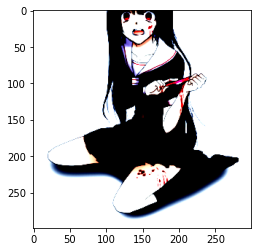

In [7]:
# This cell gets an example image and shows us the model prediction on the image that the model sees
# Good examples: 1, 2, 11, 68
# Examples with multiple regions of interest: 16
model.eval()
torch.manual_seed(0)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True, num_workers=2)
#images, labels = next(itertools.islice(testloader, 48, None))
images, labels = next(itertools.islice(testloader, 1, None))

print(labels)
outputs = model(images.to(device))
_, predicted = outputs.max(1)
print(predicted)
pred_val = predicted.item()
plt.imshow( images.detach().cpu().squeeze().permute(1, 2, 0)  )

In [ ]:
# Samples to investigate further due to unnecessary additional obfuscations: 
# 16, 29, 21, 40, 50

## Cells below are just me experimenting with different attribution methods

In [15]:
from captum.attr import Lime

# Blurring specified parts of image: Experiments

# Obfuscation from segmented features
SLIC Documentation: https://scikit-image.org/docs/dev/api/skimage.segmentation.html?highlight=slic#skimage.segmentation.slic

In [7]:
from skimage import segmentation
from pytorch_grad_cam import XGradCAM, GradCAM, FullGrad, GradCAMPlusPlus
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io

In [40]:
def get_grayscale_grad_cam(image):
    input_tensor = image.to(device)
    targets = [ClassifierOutputTarget(1)]
    target_layers = [model.layer4[-1]]
    cam = FullGrad(model=model, target_layers=target_layers)
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
    grayscale_cam = grayscale_cam[0, :]
    
    return(grayscale_cam)

In [34]:
def get_grayscale_grad_cam(image):
    input_tensor = image.to(device)
    targets = [ClassifierOutputTarget(1)]
    target_layers = [model.layer4[-1]]
    cam = XGradCAM(model=model, target_layers=target_layers)
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
    grayscale_cam = grayscale_cam[0, :]
    
    return(grayscale_cam)


In [8]:
def get_grayscale_grad_cam(image):
    input_tensor = image.to(device)
    targets = [ClassifierOutputTarget(1)]
    #target_layers = [model.layer4[-1]]
    target_layers = [model.layer4[-1]]
    cam = GradCAM(model=model, target_layers=target_layers)
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
    grayscale_cam = grayscale_cam[0, :]
    
    return(grayscale_cam)

In [37]:
def get_grayscale_grad_cam(image):
    input_tensor = image.to(device)
    targets = [ClassifierOutputTarget(1)]
    #target_layers = [model.layer4[-1]]
    target_layers = [model.layer4[-1].conv3]
    cam = GradCAMPlusPlus(model=model, target_layers=target_layers)
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
    grayscale_cam = grayscale_cam[0, :]
    
    return(grayscale_cam)

In [9]:
def segmentation_info(image, num_segments, compactness):
    img_np = image.detach().cpu().squeeze().permute(1, 2, 0).numpy()
    segments_slic = slic(img_np, n_segments = num_segments, compactness=compactness,
                     start_label=1)
    num_segments = len(np.unique(segments_slic))
    list_unique_regions = np.unique(segments_slic)
    segment_pixel_num_list = []
    total_pixels = 0
    for i in (list_unique_regions):
        num_pixels = np.count_nonzero(segments_slic == i)
        segment_pixel_num_list.append(num_pixels)
        total_pixels += num_pixels
    
    
    information_for_each_segment = []
    for i in (list_unique_regions):
        image_list = []
        image_list.append(i)
        image_list.append(segment_pixel_num_list[i-1])
        image_list.append(total_pixels)
        information_for_each_segment.append(image_list)

    return(information_for_each_segment, segments_slic, num_segments)


# I want to get the average attribution score for each segment
def cam_processor_for_segments(grayscale_cam_output, segments_slic):
    
    
    
    list_unique_regions = np.unique(segments_slic)
    region_attr_score = []
    final_region_attr_score = []
    num_pixels_in_region_list = []
    
    for i in (list_unique_regions):
        row_counter = 0
        column_counter = 0
        region_attr_score = []
        num_pixels_in_region = 0
        for row in grayscale_cam_output:
            for cell in row:
                current_score = grayscale_cam_output[row_counter, column_counter]
                current_region = segments_slic[row_counter, column_counter]
                if current_region == i:
                    region_attr_score.append(current_score)
                    num_pixels_in_region += 1
                column_counter +=1
            row_counter += 1
            column_counter = 0
        avg_score = np.mean(region_attr_score)
        final_region_attr_score.append(avg_score)
        num_pixels_in_region_list.append(num_pixels_in_region)
    
    unique_region_info = []
    for i in (list_unique_regions):
        image_list = []
        image_list.append(i)
        image_list.append(final_region_attr_score[i-1])
        image_list.append(num_pixels_in_region_list[i-1])
        image_list.append(np.sum(num_pixels_in_region_list))
        unique_region_info.append(image_list)
    
    return(unique_region_info)

In [10]:

def get_feature_masks(image, attributions, segments_slic):
    segments_slic_1 = segments_slic
    features = []
    for i in attributions:
        feature = np.where(i==segments_slic_1, 1, 0)
        features.append(feature)
        
    return(features)


def attribution_ranker(cam_processor_for_segments_output, num_top_attr):
    ranked_images = sorted(cam_processor_for_segments_output, key=itemgetter(1), reverse=True)
    top_ranked_features = []
    for i in range(num_top_attr):
        top_ranked_features.append(ranked_images[i][0])
        
    return top_ranked_features



In [11]:
def get_image_versions(image, features_list, model, SMU_class_index):
    image_versions = []
    num_pixels_changed = []
    total_attr_list = []

    powerset_list = list(more_itertools.powerset(features_list))
    powerset_list = [list(ele) for ele in powerset_list]
    num_versions = len(powerset_list)
    
    original_image = invTrans(image)
    image_versions.append(original_image)
    num_pixels_changed.append(0)
    total_attr_list.append(np.zeros((299, 299)))
    
    for version in range(num_versions - 1):
        obfuscated_image = image
        total_attribution = np.zeros((299, 299))
        total_num_pixels = total_attribution.size
        for mask in range(len(powerset_list[version + 1])):
            total_attribution += powerset_list[version + 1][mask]
            #print(np.max(powerset_list[version + 1][mask]))
        #print(np.max(total_attribution))
        num_changes = np.count_nonzero(total_attribution)
        num_pixels_changed.append(num_changes)
        total_attr_list.append(total_attribution)
        #print(num_changes)
        obfuscated_image = blur_image_from_attribution(image = obfuscated_image,
                                                       attribution_map = total_attribution)
        obfuscated_image = obfuscated_image.to(device)
        obfuscated_image = invTrans(obfuscated_image)
        
        image_versions.append(obfuscated_image)
    
    scores = []
    for i in range(num_versions):
        current_image = image_versions[i].to(device)
        #current_image = good_img_transform(current_image).to(device)
        score = SMU_cost_function(num_total_pixels = total_num_pixels,
                                  num_obf_pixels = num_pixels_changed[i],
                                  model = model,
                                  image = current_image,
                                  SMU_class_index = SMU_class_index)
        scores.append(score)
    
    
    
    unique_image_info = []
    for i in range(num_versions):
        image_list = []
        image_list.append(image_versions[i])
        image_list.append(num_pixels_changed[i])
        image_list.append(total_num_pixels)
        image_list.append(scores[i])
        image_list.append(total_attr_list[i])
        unique_image_info.append(image_list)
    
    
    return(unique_image_info)


def image_rankings(get_image_versions):
    #for idx in iterative_Grad_CAM_counterfactual_masking_output
    ranked_images = sorted(get_image_versions, key=itemgetter(3))
    
    return ranked_images



In [12]:
def blur_image_from_attribution(image, attribution_map):
    # attribution map is the attributions after being passed through the attribution processor
    # image is a tensor
    # will output the blurred image based on the attribution map
    
    
    #average_img = image.squeeze().cpu().permute(1, 2, 0).numpy()
    #avg = np.average(average_img)
    #blurred_img = cv2.GaussianBlur(image.squeeze().cpu().permute(1, 2, 0).numpy(), (181, 181), 0)
    avg = np.float32(-2.1179039478302)
    #avg_img = np.where(average_img > 9999, average_img, avg)
    
    #attribution_map = attribution_map.detach().squeeze().cpu().numpy()
    
    mask = [attribution_map, attribution_map, attribution_map]
    mask = np.array(mask)
    mask = mask.transpose(1,2,0)
    
    out = np.where(mask==np.array([0, 0, 0]), image.squeeze().cpu().permute(1, 2, 0).numpy(), avg)
    #out = np.where(mask==np.array([0, 0, 0]), image.squeeze().cpu().permute(1, 2, 0).numpy(), blurred_img)
    
    out = torch.tensor(out)
    out = out.permute(2,0,1)
    out = out.unsqueeze(0)
    
    return out

def SMU_cost_function(num_total_pixels, num_obf_pixels, model, image, SMU_class_index):
    image = good_img_transform(image)
    logits = model(image).cpu()
    probs = F.softmax(logits, dim=1)
    probs = probs.detach().cpu()
    probs = probs.tolist()[0]
    probs = probs[SMU_class_index]
    
    if num_obf_pixels == 0:
        score = 1000
    
    else:
        # Punish for prob too far from 0.5. We want to obfuscate just enough to change model prediction
        score = probs + (num_obf_pixels / num_total_pixels)
    
    if probs > 0.50:
        score += 1
    if probs > 0.75:
        score += 1
    if probs > 0.80:
        score += 10**(1+probs)
    #print(probs)
    return score

def full_obfuscation_function(image, num_segments, num_top_attr, compactness, model, SMU_class_index):
    example_10 = get_grayscale_grad_cam(image = image)
    seg = segmentation_info(image = image, num_segments = num_segments, compactness = compactness)
    avg_attr_scores = cam_processor_for_segments(grayscale_cam_output = example_10, segments_slic = seg[1])
    top_attrs = attribution_ranker(cam_processor_for_segments_output = avg_attr_scores, num_top_attr = num_top_attr)
    features_1 = get_feature_masks(image = image, attributions = top_attrs, segments_slic = seg[1])
    ex_1 = get_image_versions(image = image, features_list = features_1, model = model, SMU_class_index = SMU_class_index)
    ranked = image_rankings(get_image_versions = ex_1)
    
    return ranked

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([1])
tensor([1], device='cuda:0')
-1.8952821493148804


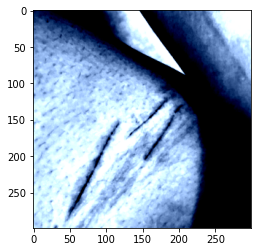

In [32]:
# This cell gets an example image and shows us the model prediction on the image that the model sees
# Porn samples: 1,2,3
model.eval()
torch.manual_seed(0)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True, num_workers=2)
#images, labels = next(itertools.islice(testloader, 48, None))
images, labels = next(itertools.islice(testloader, 8, None))

print(labels)
outputs = model(images.to(device))
_, predicted = outputs.max(1)
print(predicted)
pred_val = predicted.item()
print(images.min().item())
plt.imshow( images.detach().cpu().squeeze().permute(1, 2, 0)  )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[19, 20, 13, 9, 11, 16, 4, 10]


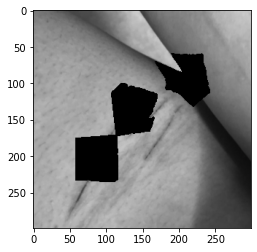

In [33]:
from skimage import segmentation
from pytorch_grad_cam import XGradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io

example_10 = get_grayscale_grad_cam(image = images)
seg = segmentation_info(image = images, num_segments = 30, compactness = 50)
avg_attr_scores = cam_processor_for_segments(grayscale_cam_output = example_10, segments_slic = seg[1])
top_attrs = attribution_ranker(cam_processor_for_segments_output = avg_attr_scores, num_top_attr = 8)
features_1 = get_feature_masks(image = images, attributions = top_attrs, segments_slic = seg[1])
ex_1 = get_image_versions(image = images, features_list = features_1, model = model, SMU_class_index = 1)
ranked = image_rankings(get_image_versions = ex_1)

features_2 = features_1
print(top_attrs)

plt.imshow(ranked[0][0].detach().cpu().squeeze().permute(1, 2, 0))

In [34]:
for i in range(len(avg_attr_scores)):
    print(avg_attr_scores[i])

[1, 0.10715995, 3319, 89401]
[2, 0.2214137, 3229, 89401]
[3, 0.2202725, 2544, 89401]
[4, 0.24685077, 3944, 89401]
[5, 0.16547325, 4062, 89401]
[6, 0.17791535, 3568, 89401]
[7, 0.2011705, 3298, 89401]
[8, 0.061811782, 3331, 89401]
[9, 0.2947179, 3290, 89401]
[10, 0.23380587, 3809, 89401]
[11, 0.288946, 3571, 89401]
[12, 0.1937211, 3513, 89401]
[13, 0.44794938, 3367, 89401]
[14, 0.092491776, 3291, 89401]
[15, 0.1998809, 3820, 89401]
[16, 0.27047387, 3849, 89401]
[17, 0.04978755, 3638, 89401]
[18, 0.10581091, 3765, 89401]
[19, 0.67725843, 3639, 89401]
[20, 0.56654507, 3598, 89401]
[21, 0.0, 4391, 89401]
[22, 0.086191595, 3765, 89401]
[23, 0.00682315, 3663, 89401]
[24, 0.19017734, 3632, 89401]
[25, 0.20679134, 3505, 89401]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


256
0.5868852396193152
28801
89401
tensor(-2.1179, device='cuda:0')
[0.7352700233459473, 0.2647300064563751]
0.2647300064563751


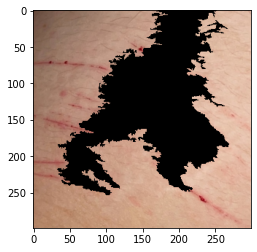

In [98]:
print(len(ranked))
index = 0
example = ranked[index][0]
print(ranked[index][3])
print(ranked[index][1])
print(ranked[index][2])
exam_img = good_img_transform(example)
print(exam_img.min())
logits = model(exam_img).cpu()
probs = F.softmax(logits, dim=1)
probs = probs.detach().cpu()
probs = probs.tolist()[0]
print(probs)
print(probs[1])
plt.imshow( example.detach().cpu().squeeze().permute(1, 2, 0)  )

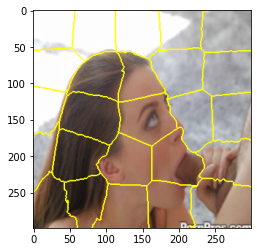

In [66]:
inv_img = invTrans(images)
img_np = inv_img.detach().cpu().squeeze().permute(1, 2, 0).numpy()
#plt.imshow(img_np)
# compactness=50
segments_slic = slic(img_np, n_segments=30, compactness=50,
                     start_label=1)
plt.imshow(segmentation.mark_boundaries(img_np, segments_slic))

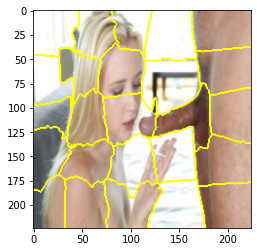

In [183]:
inv_img = invTrans(images)
img_np = inv_img.detach().cpu().squeeze().permute(1, 2, 0).numpy()
#plt.imshow(img_np)
# compactness=50
segments_slic = slic(img_np, n_segments=30, compactness=1,
                     start_label=1, slic_zero=True)
plt.imshow(segmentation.mark_boundaries(img_np, segments_slic))

In [106]:
print(top_attrs)

[19, 21, 17, 12, 16, 14, 9, 13]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


256
[0.04290316626429558, 0.9570968151092529]


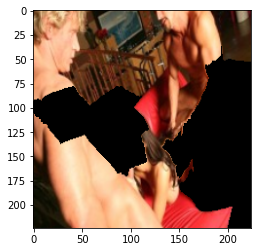

In [107]:
print(len(ranked))
index = 255
example = ex_1[index][0]
#print(ex_1[index][3])
#print(ex_1[index][1])
#print(ranked[index][2])
exam_img = good_img_transform(example)
logits = model(exam_img).cpu()
probs = F.softmax(logits, dim=1)
probs = probs.detach().cpu()
probs = probs.tolist()[0]
print(probs)
plt.imshow( example.detach().cpu().squeeze().permute(1, 2, 0)  )

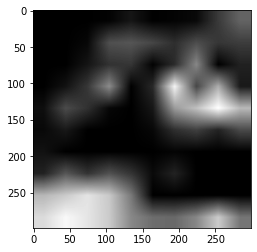

In [103]:
from pytorch_grad_cam import XGradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
input_tensor = exam_img.to(device)
targets = [ClassifierOutputTarget(1)]
target_layers = [model.layer4[-1]]
cam = GradCAM(model=model, target_layers=target_layers)
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
grayscale_cam = grayscale_cam[0, :]
#visualization = show_cam_on_image(input_tensor, grayscale_cam, use_rgb=T
plt.imshow(grayscale_cam, cmap='gray', vmin=0, vmax=1)

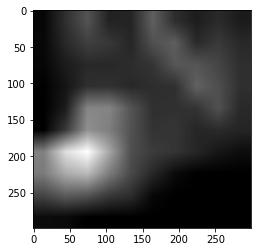

In [21]:
from pytorch_grad_cam import FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
input_tensor = images.to(device)
targets = [ClassifierOutputTarget(1)]
target_layers = [model.layer4[-1]]
cam = GradCAM(model=model, target_layers=target_layers)
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
grayscale_cam = grayscale_cam[0, :]
#visualization = show_cam_on_image(input_tensor, grayscale_cam, use_rgb=T
plt.imshow(grayscale_cam, cmap='gray', vmin=0, vmax=1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


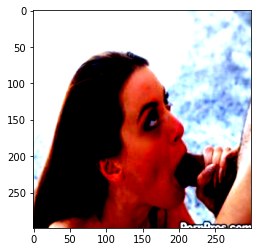

In [63]:
plt.imshow( images.detach().cpu().squeeze().permute(1, 2, 0)  )

# Obfuscation Testing

In [22]:
# To test our algorithm with no region dilation (8 regions)
i = 0
n = 0
image_info_list = []
while i < 150:
    torch.manual_seed(0)
    testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True, num_workers=2)
    images, labels = next(itertools.islice(testloader, n, None))
    just_label = labels.item()
    
    outputs = model(images.to(device))
    _, predicted = outputs.max(1)
    predicted = predicted.cpu().item()
    #n += 1
    #print()
    #print(predicted)
    if just_label == 1 and predicted ==1:
        print('index:', n)
        i += 1
        
        example_10 = get_grayscale_grad_cam(image = images)
        seg = segmentation_info(image = images, num_segments = 30, compactness = 50)
        avg_attr_scores = cam_processor_for_segments(grayscale_cam_output = example_10, segments_slic = seg[1])
        top_attrs = attribution_ranker(cam_processor_for_segments_output = avg_attr_scores, num_top_attr = 8)
        features_1 = get_feature_masks(image = images, attributions = top_attrs, segments_slic = seg[1])
        ex_1 = get_image_versions(image = images, features_list = features_1, model = model, SMU_class_index = 1)
        ranked = image_rankings(get_image_versions = ex_1)
        
        
        image_info = []
        
        example = ranked[0][0]
        exam_img = good_img_transform(example)
        logits = model(exam_img).cpu()
        probs = F.softmax(logits, dim=1)
        probs = probs.detach().cpu()
        probs = probs.tolist()[0]
        probs = probs[1]
        image_info.append(probs)
        
        num_pixels_obf = ranked[0][1]
        image_info.append(num_pixels_obf)
        
        image_info_list.append(image_info)
    n += 1

index: 1
index: 3
index: 4
index: 7
index: 8
index: 9
index: 11
index: 14
index: 16
index: 20
index: 21
index: 22
index: 23
index: 24
index: 26
index: 27
index: 34
index: 35
index: 36
index: 38
index: 39
index: 44
index: 50
index: 53
index: 54
index: 55
index: 56
index: 61
index: 62
index: 70
index: 71
index: 72
index: 77
index: 79
index: 82
index: 86
index: 96
index: 99
index: 101
index: 102
index: 104
index: 107
index: 109
index: 113
index: 120
index: 122
index: 123
index: 124
index: 131
index: 133
index: 137
index: 147
index: 156
index: 160
index: 161
index: 162
index: 163
index: 167
index: 168
index: 172
index: 178
index: 180
index: 181
index: 182
index: 186
index: 189
index: 192
index: 193
index: 195
index: 200
index: 202
index: 205
index: 206
index: 211
index: 214
index: 215
index: 216
index: 220
index: 221
index: 222
index: 223
index: 225
index: 227
index: 228
index: 229
index: 235
index: 236
index: 237
index: 239
index: 241
index: 242
index: 243
index: 245
index: 249
index: 250

In [23]:
success = 0
total = len(image_info_list)
total_pix = total * 299 * 299
total_obf = 0
for i in range(len(image_info_list)):
    if image_info_list[i][0] < 0.5:
        success += 1
    total_obf += image_info_list[i][1] 

print(success / total)
print(total_obf / total_pix)

0.8666666666666667
0.10788246216485274


In [18]:
# To test unlimited dilation on our algorithm (8 regions)
from scipy import ndimage
i = 0
n = 0
image_info_list = []
while i < 150:
    torch.manual_seed(0)
    testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True, num_workers=2)
    images, labels = next(itertools.islice(testloader, n, None))
    just_label = labels.item()
    
    outputs = model(images.to(device))
    _, predicted = outputs.max(1)
    predicted = predicted.cpu().item()
    #n += 1
    #print()
    #print(predicted)
    if just_label == 1 and predicted ==1:
        print('index:', n)
        i += 1
        example_10 = get_grayscale_grad_cam(image = images)
        seg = segmentation_info(image = images, num_segments = 30, compactness = 50)
        avg_attr_scores = cam_processor_for_segments(grayscale_cam_output = example_10, segments_slic = seg[1])
        top_attrs = attribution_ranker(cam_processor_for_segments_output = avg_attr_scores, num_top_attr = 8)
        features_1 = get_feature_masks(image = images, attributions = top_attrs, segments_slic = seg[1])
        ex_1 = get_image_versions(image = images, features_list = features_1, model = model, SMU_class_index = 1)
        ranked = image_rankings(get_image_versions = ex_1)
        

        example = ranked[0][0]
        exam_img = good_img_transform(example)
        logits = model(exam_img).cpu()
        probs = F.softmax(logits, dim=1)
        probs = probs.detach().cpu()
        probs = probs.tolist()[0]
        probs = probs[1]
        if probs > 0.5:
            example_attribution_map = ranked[0][4]
            dil = obfuscation_dilation(image = images,
                           attribution_map = example_attribution_map,
                           num_dilations = 5)
            ranked[0][0] = dil[0]
            ranked[0][1] = np.count_nonzero(dil[1])
            
        
        
        image_info = []
        
        example = ranked[0][0]
        exam_img = good_img_transform(example)
        logits = model(exam_img.to(device)).cpu()
        probs = F.softmax(logits, dim=1)
        probs = probs.detach().cpu()
        probs = probs.tolist()[0]
        probs = probs[1]
        image_info.append(probs)
        
        num_pixels_obf = ranked[0][1]
        image_info.append(num_pixels_obf)
        
        image_info_list.append(image_info)
    n += 1

index: 1
index: 3
index: 4
index: 7
index: 8
index: 9
index: 11
index: 14
index: 16
index: 20
index: 21
index: 22
index: 23
index: 24
index: 26
index: 27
index: 34
index: 35
index: 36
index: 38
index: 39
index: 44
index: 50
index: 53
index: 54
index: 55
index: 56
index: 61
index: 62
index: 70
index: 71
index: 72
index: 77
index: 79
index: 82
index: 86
index: 96
index: 99
index: 101
index: 102
index: 104
index: 107
index: 109
index: 113
index: 120
index: 122
index: 123
index: 124
index: 131
index: 133
index: 137
index: 147
index: 156
index: 160
index: 161
index: 162
index: 163
index: 167
index: 168
index: 172
index: 178
index: 180
index: 181
index: 182
index: 186
index: 189
index: 192
index: 193
index: 195
index: 200
index: 202
index: 205
index: 206
index: 211
index: 214
index: 215
index: 216
index: 220
index: 221
index: 222
index: 223
index: 225
index: 227
index: 228
index: 229
index: 235
index: 236
index: 237
index: 239
index: 241
index: 242
index: 243
index: 245
index: 249
index: 250

In [19]:
success = 0
total = len(image_info_list)
total_pix = total * 299 * 299
total_obf = 0
for i in range(len(image_info_list)):
    if image_info_list[i][0] < 0.5:
        success += 1
    total_obf += image_info_list[i][1] 

print(success / total)
print(total_obf / total_pix)

1.0
0.15368702065226714


In [20]:
# To test our algorithm with no region dilation (6 regions)
i = 0
n = 0
image_info_list = []
while i < 150:
    torch.manual_seed(0)
    testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True, num_workers=2)
    images, labels = next(itertools.islice(testloader, n, None))
    just_label = labels.item()
    
    outputs = model(images.to(device))
    _, predicted = outputs.max(1)
    predicted = predicted.cpu().item()
    #n += 1
    #print()
    #print(predicted)
    if just_label == 1 and predicted ==1:
        print('index:', n)
        i += 1
        
        example_10 = get_grayscale_grad_cam(image = images)
        seg = segmentation_info(image = images, num_segments = 30, compactness = 50)
        avg_attr_scores = cam_processor_for_segments(grayscale_cam_output = example_10, segments_slic = seg[1])
        top_attrs = attribution_ranker(cam_processor_for_segments_output = avg_attr_scores, num_top_attr = 6)
        features_1 = get_feature_masks(image = images, attributions = top_attrs, segments_slic = seg[1])
        ex_1 = get_image_versions(image = images, features_list = features_1, model = model, SMU_class_index = 1)
        ranked = image_rankings(get_image_versions = ex_1)
        
        
        image_info = []
        
        example = ranked[0][0]
        exam_img = good_img_transform(example)
        logits = model(exam_img).cpu()
        probs = F.softmax(logits, dim=1)
        probs = probs.detach().cpu()
        probs = probs.tolist()[0]
        probs = probs[1]
        image_info.append(probs)
        
        num_pixels_obf = ranked[0][1]
        image_info.append(num_pixels_obf)
        
        image_info_list.append(image_info)
    n += 1

index: 1
index: 3
index: 4
index: 7
index: 8
index: 9
index: 11
index: 14
index: 16
index: 20
index: 21
index: 22
index: 23
index: 24
index: 26
index: 27
index: 34
index: 35
index: 36
index: 38
index: 39
index: 44
index: 50
index: 53
index: 54
index: 55
index: 56
index: 61
index: 62
index: 70
index: 71
index: 72
index: 77
index: 79
index: 82
index: 86
index: 96
index: 99
index: 101
index: 102
index: 104
index: 107
index: 109
index: 113
index: 120
index: 122
index: 123
index: 124
index: 131
index: 133
index: 137
index: 147
index: 156
index: 160
index: 161
index: 162
index: 163
index: 167
index: 168
index: 172
index: 178
index: 180
index: 181
index: 182
index: 186
index: 189
index: 192
index: 193
index: 195
index: 200
index: 202
index: 205
index: 206
index: 211
index: 214
index: 215
index: 216
index: 220
index: 221
index: 222
index: 223
index: 225
index: 227
index: 228
index: 229
index: 235
index: 236
index: 237
index: 239
index: 241
index: 242
index: 243
index: 245
index: 249
index: 250

In [21]:
success = 0
total = len(image_info_list)
total_pix = total * 299 * 299
total_obf = 0
for i in range(len(image_info_list)):
    if image_info_list[i][0] < 0.5:
        success += 1
    total_obf += image_info_list[i][1] 

print(success / total)
print(total_obf / total_pix)

0.78
0.10067419081814893


In [22]:
# To test unlimited dilation on our algorithm (6 regions)
from scipy import ndimage
i = 0
n = 0
image_info_list = []
while i < 150:
    torch.manual_seed(0)
    testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True, num_workers=2)
    images, labels = next(itertools.islice(testloader, n, None))
    just_label = labels.item()
    
    outputs = model(images.to(device))
    _, predicted = outputs.max(1)
    predicted = predicted.cpu().item()
    #n += 1
    #print()
    #print(predicted)
    if just_label == 1 and predicted ==1:
        print('index:', n)
        i += 1
        example_10 = get_grayscale_grad_cam(image = images)
        seg = segmentation_info(image = images, num_segments = 30, compactness = 50)
        avg_attr_scores = cam_processor_for_segments(grayscale_cam_output = example_10, segments_slic = seg[1])
        top_attrs = attribution_ranker(cam_processor_for_segments_output = avg_attr_scores, num_top_attr = 6)
        features_1 = get_feature_masks(image = images, attributions = top_attrs, segments_slic = seg[1])
        ex_1 = get_image_versions(image = images, features_list = features_1, model = model, SMU_class_index = 1)
        ranked = image_rankings(get_image_versions = ex_1)
        

        example = ranked[0][0]
        exam_img = good_img_transform(example)
        logits = model(exam_img).cpu()
        probs = F.softmax(logits, dim=1)
        probs = probs.detach().cpu()
        probs = probs.tolist()[0]
        probs = probs[1]
        if probs > 0.5:
            example_attribution_map = ranked[0][4]
            dil = obfuscation_dilation(image = images,
                           attribution_map = example_attribution_map,
                           num_dilations = 5)
            ranked[0][0] = dil[0]
            ranked[0][1] = np.count_nonzero(dil[1])
            
        
        
        image_info = []
        
        example = ranked[0][0]
        exam_img = good_img_transform(example)
        logits = model(exam_img.to(device)).cpu()
        probs = F.softmax(logits, dim=1)
        probs = probs.detach().cpu()
        probs = probs.tolist()[0]
        probs = probs[1]
        image_info.append(probs)
        
        num_pixels_obf = ranked[0][1]
        image_info.append(num_pixels_obf)
        
        image_info_list.append(image_info)
    n += 1

index: 1
index: 3
index: 4
index: 7
index: 8
index: 9
index: 11
index: 14
index: 16
index: 20
index: 21
index: 22
index: 23
index: 24
index: 26
index: 27
index: 34
index: 35
index: 36
index: 38
index: 39
index: 44
index: 50
index: 53
index: 54
index: 55
index: 56
index: 61
index: 62
index: 70
index: 71
index: 72
index: 77
index: 79
index: 82
index: 86
index: 96
index: 99
index: 101
index: 102
index: 104
index: 107
index: 109
index: 113
index: 120
index: 122
index: 123
index: 124
index: 131
index: 133
index: 137
index: 147
index: 156
index: 160
index: 161
index: 162
index: 163
index: 167
index: 168
index: 172
index: 178
index: 180
index: 181
index: 182
index: 186
index: 189
index: 192
index: 193
index: 195
index: 200
index: 202
index: 205
index: 206
index: 211
index: 214
index: 215
index: 216
index: 220
index: 221
index: 222
index: 223
index: 225
index: 227
index: 228
index: 229
index: 235
index: 236
index: 237
index: 239
index: 241
index: 242
index: 243
index: 245
index: 249
index: 250

In [23]:
success = 0
total = len(image_info_list)
total_pix = total * 299 * 299
total_obf = 0
for i in range(len(image_info_list)):
    if image_info_list[i][0] < 0.5:
        success += 1
    total_obf += image_info_list[i][1] 

print(success / total)
print(total_obf / total_pix)

1.0
0.17877324265574956


In [24]:
# To test our algorithm with no region dilation (4 regions)
i = 0
n = 0
image_info_list = []
while i < 150:
    torch.manual_seed(0)
    testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True, num_workers=2)
    images, labels = next(itertools.islice(testloader, n, None))
    just_label = labels.item()
    
    outputs = model(images.to(device))
    _, predicted = outputs.max(1)
    predicted = predicted.cpu().item()
    #n += 1
    #print()
    #print(predicted)
    if just_label == 1 and predicted ==1:
        print('index:', n)
        i += 1
        
        example_10 = get_grayscale_grad_cam(image = images)
        seg = segmentation_info(image = images, num_segments = 30, compactness = 50)
        avg_attr_scores = cam_processor_for_segments(grayscale_cam_output = example_10, segments_slic = seg[1])
        top_attrs = attribution_ranker(cam_processor_for_segments_output = avg_attr_scores, num_top_attr = 4)
        features_1 = get_feature_masks(image = images, attributions = top_attrs, segments_slic = seg[1])
        ex_1 = get_image_versions(image = images, features_list = features_1, model = model, SMU_class_index = 1)
        ranked = image_rankings(get_image_versions = ex_1)
        
        
        image_info = []
        
        example = ranked[0][0]
        exam_img = good_img_transform(example)
        logits = model(exam_img).cpu()
        probs = F.softmax(logits, dim=1)
        probs = probs.detach().cpu()
        probs = probs.tolist()[0]
        probs = probs[1]
        image_info.append(probs)
        
        num_pixels_obf = ranked[0][1]
        image_info.append(num_pixels_obf)
        
        image_info_list.append(image_info)
    n += 1

index: 1
index: 3
index: 4
index: 7
index: 8
index: 9
index: 11
index: 14
index: 16
index: 20
index: 21
index: 22
index: 23
index: 24
index: 26
index: 27
index: 34
index: 35
index: 36
index: 38
index: 39
index: 44
index: 50
index: 53
index: 54
index: 55
index: 56
index: 61
index: 62
index: 70
index: 71
index: 72
index: 77
index: 79
index: 82
index: 86
index: 96
index: 99
index: 101
index: 102
index: 104
index: 107
index: 109
index: 113
index: 120
index: 122
index: 123
index: 124
index: 131
index: 133
index: 137
index: 147
index: 156
index: 160
index: 161
index: 162
index: 163
index: 167
index: 168
index: 172
index: 178
index: 180
index: 181
index: 182
index: 186
index: 189
index: 192
index: 193
index: 195
index: 200
index: 202
index: 205
index: 206
index: 211
index: 214
index: 215
index: 216
index: 220
index: 221
index: 222
index: 223
index: 225
index: 227
index: 228
index: 229
index: 235
index: 236
index: 237
index: 239
index: 241
index: 242
index: 243
index: 245
index: 249
index: 250

In [25]:
success = 0
total = len(image_info_list)
total_pix = total * 299 * 299
total_obf = 0
for i in range(len(image_info_list)):
    if image_info_list[i][0] < 0.5:
        success += 1
    total_obf += image_info_list[i][1] 

print(success / total)
print(total_obf / total_pix)

0.5933333333333334
0.08530329638370936


In [26]:
# To test unlimited dilation on our algorithm (4 regions)
from scipy import ndimage
i = 0
n = 0
image_info_list = []
while i < 150:
    torch.manual_seed(0)
    testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True, num_workers=2)
    images, labels = next(itertools.islice(testloader, n, None))
    just_label = labels.item()
    
    outputs = model(images.to(device))
    _, predicted = outputs.max(1)
    predicted = predicted.cpu().item()
    #n += 1
    #print()
    #print(predicted)
    if just_label == 1 and predicted ==1:
        print('index:', n)
        i += 1
        example_10 = get_grayscale_grad_cam(image = images)
        seg = segmentation_info(image = images, num_segments = 30, compactness = 50)
        avg_attr_scores = cam_processor_for_segments(grayscale_cam_output = example_10, segments_slic = seg[1])
        top_attrs = attribution_ranker(cam_processor_for_segments_output = avg_attr_scores, num_top_attr = 4)
        features_1 = get_feature_masks(image = images, attributions = top_attrs, segments_slic = seg[1])
        ex_1 = get_image_versions(image = images, features_list = features_1, model = model, SMU_class_index = 1)
        ranked = image_rankings(get_image_versions = ex_1)
        

        example = ranked[0][0]
        exam_img = good_img_transform(example)
        logits = model(exam_img).cpu()
        probs = F.softmax(logits, dim=1)
        probs = probs.detach().cpu()
        probs = probs.tolist()[0]
        probs = probs[1]
        if probs > 0.5:
            example_attribution_map = ranked[0][4]
            dil = obfuscation_dilation(image = images,
                           attribution_map = example_attribution_map,
                           num_dilations = 5)
            ranked[0][0] = dil[0]
            ranked[0][1] = np.count_nonzero(dil[1])
            
        
        
        image_info = []
        
        example = ranked[0][0]
        exam_img = good_img_transform(example)
        logits = model(exam_img.to(device)).cpu()
        probs = F.softmax(logits, dim=1)
        probs = probs.detach().cpu()
        probs = probs.tolist()[0]
        probs = probs[1]
        image_info.append(probs)
        
        num_pixels_obf = ranked[0][1]
        image_info.append(num_pixels_obf)
        
        image_info_list.append(image_info)
    n += 1

index: 1
index: 3
index: 4
index: 7
index: 8
index: 9
index: 11
index: 14
index: 16
index: 20
index: 21
index: 22
index: 23
index: 24
index: 26
index: 27
index: 34
index: 35
index: 36
index: 38
index: 39
index: 44
index: 50
index: 53
index: 54
index: 55
index: 56
index: 61
index: 62
index: 70
index: 71
index: 72
index: 77
index: 79
index: 82
index: 86
index: 96
index: 99
index: 101
index: 102
index: 104
index: 107
index: 109
index: 113
index: 120
index: 122
index: 123
index: 124
index: 131
index: 133
index: 137
index: 147
index: 156
index: 160
index: 161
index: 162
index: 163
index: 167
index: 168
index: 172
index: 178
index: 180
index: 181
index: 182
index: 186
index: 189
index: 192
index: 193
index: 195
index: 200
index: 202
index: 205
index: 206
index: 211
index: 214
index: 215
index: 216
index: 220
index: 221
index: 222
index: 223
index: 225
index: 227
index: 228
index: 229
index: 235
index: 236
index: 237
index: 239
index: 241
index: 242
index: 243
index: 245
index: 249
index: 250

In [27]:
success = 0
total = len(image_info_list)
total_pix = total * 299 * 299
total_obf = 0
for i in range(len(image_info_list)):
    if image_info_list[i][0] < 0.5:
        success += 1
    total_obf += image_info_list[i][1] 

print(success / total)
print(total_obf / total_pix)

1.0
0.25394853897980263


In [28]:
# To test limited dilation on our algorithm (8 regions)
from scipy import ndimage
i = 0
n = 0
image_info_list = []
while i < 150:
    torch.manual_seed(0)
    testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True, num_workers=2)
    images, labels = next(itertools.islice(testloader, n, None))
    just_label = labels.item()
    
    outputs = model(images.to(device))
    _, predicted = outputs.max(1)
    predicted = predicted.cpu().item()
    #n += 1
    #print()
    #print(predicted)
    if just_label == 1 and predicted ==1:
        print('index:', n)
        i += 1
        example_10 = get_grayscale_grad_cam(image = images)
        seg = segmentation_info(image = images, num_segments = 30, compactness = 50)
        avg_attr_scores = cam_processor_for_segments(grayscale_cam_output = example_10, segments_slic = seg[1])
        top_attrs = attribution_ranker(cam_processor_for_segments_output = avg_attr_scores, num_top_attr = 8)
        features_1 = get_feature_masks(image = images, attributions = top_attrs, segments_slic = seg[1])
        ex_1 = get_image_versions(image = images, features_list = features_1, model = model, SMU_class_index = 1)
        ranked = image_rankings(get_image_versions = ex_1)
        

        example = ranked[0][0]
        exam_img = good_img_transform(example)
        logits = model(exam_img).cpu()
        probs = F.softmax(logits, dim=1)
        probs = probs.detach().cpu()
        probs = probs.tolist()[0]
        probs = probs[1]
        if probs > 0.5:
            example_attribution_map = ranked[0][4]
            dil = obfuscation_dilation_limited(image = images,
                           attribution_map = example_attribution_map,
                           num_dilations = 5)
            ranked[0][0] = dil[0]
            ranked[0][1] = np.count_nonzero(dil[1])
            
        
        
        image_info = []
        
        example = ranked[0][0]
        exam_img = good_img_transform(example)
        logits = model(exam_img.to(device)).cpu()
        probs = F.softmax(logits, dim=1)
        probs = probs.detach().cpu()
        probs = probs.tolist()[0]
        probs = probs[1]
        image_info.append(probs)
        
        num_pixels_obf = ranked[0][1]
        image_info.append(num_pixels_obf)
        
        image_info_list.append(image_info)
    n += 1

index: 1
index: 3
index: 4
index: 7
index: 8
index: 9
index: 11
index: 14
index: 16
index: 20
index: 21
index: 22
index: 23
index: 24
index: 26
index: 27
index: 34
index: 35
index: 36
index: 38
index: 39
index: 44
index: 50
index: 53
index: 54
index: 55
index: 56
index: 61
index: 62
index: 70
index: 71
index: 72
index: 77
index: 79
index: 82
index: 86
index: 96
index: 99
index: 101
index: 102
index: 104
index: 107
index: 109
index: 113
index: 120
index: 122
index: 123
index: 124
index: 131
index: 133
index: 137
index: 147
index: 156
index: 160
index: 161
index: 162
index: 163
index: 167
index: 168
index: 172
index: 178
index: 180
index: 181
index: 182
index: 186
index: 189
index: 192
index: 193
index: 195
index: 200
index: 202
index: 205
index: 206
index: 211
index: 214
index: 215
index: 216
index: 220
index: 221
index: 222
index: 223
index: 225
index: 227
index: 228
index: 229
index: 235
index: 236
index: 237
index: 239
index: 241
index: 242
index: 243
index: 245
index: 249
index: 250

In [29]:
success = 0
total = len(image_info_list)
total_pix = total * 299 * 299
total_obf = 0
for i in range(len(image_info_list)):
    if image_info_list[i][0] < 0.5:
        success += 1
    total_obf += image_info_list[i][1] 

print(success / total)
print(total_obf / total_pix)

0.9466666666666667
0.14001610720238028


In [30]:
# To test limited dilation on our algorithm (6 regions)
from scipy import ndimage
i = 0
n = 0
image_info_list = []
while i < 150:
    torch.manual_seed(0)
    testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True, num_workers=2)
    images, labels = next(itertools.islice(testloader, n, None))
    just_label = labels.item()
    
    outputs = model(images.to(device))
    _, predicted = outputs.max(1)
    predicted = predicted.cpu().item()
    #n += 1
    #print()
    #print(predicted)
    if just_label == 1 and predicted ==1:
        print('index:', n)
        i += 1
        example_10 = get_grayscale_grad_cam(image = images)
        seg = segmentation_info(image = images, num_segments = 30, compactness = 50)
        avg_attr_scores = cam_processor_for_segments(grayscale_cam_output = example_10, segments_slic = seg[1])
        top_attrs = attribution_ranker(cam_processor_for_segments_output = avg_attr_scores, num_top_attr = 6)
        features_1 = get_feature_masks(image = images, attributions = top_attrs, segments_slic = seg[1])
        ex_1 = get_image_versions(image = images, features_list = features_1, model = model, SMU_class_index = 1)
        ranked = image_rankings(get_image_versions = ex_1)
        

        example = ranked[0][0]
        exam_img = good_img_transform(example)
        logits = model(exam_img).cpu()
        probs = F.softmax(logits, dim=1)
        probs = probs.detach().cpu()
        probs = probs.tolist()[0]
        probs = probs[1]
        if probs > 0.5:
            example_attribution_map = ranked[0][4]
            dil = obfuscation_dilation_limited(image = images,
                           attribution_map = example_attribution_map,
                           num_dilations = 5)
            ranked[0][0] = dil[0]
            ranked[0][1] = np.count_nonzero(dil[1])
            
        
        
        image_info = []
        
        example = ranked[0][0]
        exam_img = good_img_transform(example)
        logits = model(exam_img.to(device)).cpu()
        probs = F.softmax(logits, dim=1)
        probs = probs.detach().cpu()
        probs = probs.tolist()[0]
        probs = probs[1]
        image_info.append(probs)
        
        num_pixels_obf = ranked[0][1]
        image_info.append(num_pixels_obf)
        
        image_info_list.append(image_info)
    n += 1

index: 1
index: 3
index: 4
index: 7
index: 8
index: 9
index: 11
index: 14
index: 16
index: 20
index: 21
index: 22
index: 23
index: 24
index: 26
index: 27
index: 34
index: 35
index: 36
index: 38
index: 39
index: 44
index: 50
index: 53
index: 54
index: 55
index: 56
index: 61
index: 62
index: 70
index: 71
index: 72
index: 77
index: 79
index: 82
index: 86
index: 96
index: 99
index: 101
index: 102
index: 104
index: 107
index: 109
index: 113
index: 120
index: 122
index: 123
index: 124
index: 131
index: 133
index: 137
index: 147
index: 156
index: 160
index: 161
index: 162
index: 163
index: 167
index: 168
index: 172
index: 178
index: 180
index: 181
index: 182
index: 186
index: 189
index: 192
index: 193
index: 195
index: 200
index: 202
index: 205
index: 206
index: 211
index: 214
index: 215
index: 216
index: 220
index: 221
index: 222
index: 223
index: 225
index: 227
index: 228
index: 229
index: 235
index: 236
index: 237
index: 239
index: 241
index: 242
index: 243
index: 245
index: 249
index: 250

In [31]:
success = 0
total = len(image_info_list)
total_pix = total * 299 * 299
total_obf = 0
for i in range(len(image_info_list)):
    if image_info_list[i][0] < 0.5:
        success += 1
    total_obf += image_info_list[i][1] 

print(success / total)
print(total_obf / total_pix)

0.9333333333333333
0.16134345999112612


In [32]:
# To test limited dilation on our algorithm (4 regions)
from scipy import ndimage
i = 0
n = 0
image_info_list = []
while i < 150:
    torch.manual_seed(0)
    testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True, num_workers=2)
    images, labels = next(itertools.islice(testloader, n, None))
    just_label = labels.item()
    
    outputs = model(images.to(device))
    _, predicted = outputs.max(1)
    predicted = predicted.cpu().item()
    #n += 1
    #print()
    #print(predicted)
    if just_label == 1 and predicted ==1:
        print('index:', n)
        i += 1
        example_10 = get_grayscale_grad_cam(image = images)
        seg = segmentation_info(image = images, num_segments = 30, compactness = 50)
        avg_attr_scores = cam_processor_for_segments(grayscale_cam_output = example_10, segments_slic = seg[1])
        top_attrs = attribution_ranker(cam_processor_for_segments_output = avg_attr_scores, num_top_attr = 4)
        features_1 = get_feature_masks(image = images, attributions = top_attrs, segments_slic = seg[1])
        ex_1 = get_image_versions(image = images, features_list = features_1, model = model, SMU_class_index = 1)
        ranked = image_rankings(get_image_versions = ex_1)
        

        example = ranked[0][0]
        exam_img = good_img_transform(example)
        logits = model(exam_img).cpu()
        probs = F.softmax(logits, dim=1)
        probs = probs.detach().cpu()
        probs = probs.tolist()[0]
        probs = probs[1]
        if probs > 0.5:
            example_attribution_map = ranked[0][4]
            dil = obfuscation_dilation_limited(image = images,
                           attribution_map = example_attribution_map,
                           num_dilations = 5)
            ranked[0][0] = dil[0]
            ranked[0][1] = np.count_nonzero(dil[1])
            
        
        
        image_info = []
        
        example = ranked[0][0]
        exam_img = good_img_transform(example)
        logits = model(exam_img.to(device)).cpu()
        probs = F.softmax(logits, dim=1)
        probs = probs.detach().cpu()
        probs = probs.tolist()[0]
        probs = probs[1]
        image_info.append(probs)
        
        num_pixels_obf = ranked[0][1]
        image_info.append(num_pixels_obf)
        
        image_info_list.append(image_info)
    n += 1

index: 1
index: 3
index: 4
index: 7
index: 8
index: 9
index: 11
index: 14
index: 16
index: 20
index: 21
index: 22
index: 23
index: 24
index: 26
index: 27
index: 34
index: 35
index: 36
index: 38
index: 39
index: 44
index: 50
index: 53
index: 54
index: 55
index: 56
index: 61
index: 62
index: 70
index: 71
index: 72
index: 77
index: 79
index: 82
index: 86
index: 96
index: 99
index: 101
index: 102
index: 104
index: 107
index: 109
index: 113
index: 120
index: 122
index: 123
index: 124
index: 131
index: 133
index: 137
index: 147
index: 156
index: 160
index: 161
index: 162
index: 163
index: 167
index: 168
index: 172
index: 178
index: 180
index: 181
index: 182
index: 186
index: 189
index: 192
index: 193
index: 195
index: 200
index: 202
index: 205
index: 206
index: 211
index: 214
index: 215
index: 216
index: 220
index: 221
index: 222
index: 223
index: 225
index: 227
index: 228
index: 229
index: 235
index: 236
index: 237
index: 239
index: 241
index: 242
index: 243
index: 245
index: 249
index: 250

In [33]:
success = 0
total = len(image_info_list)
total_pix = total * 299 * 299
total_obf = 0
for i in range(len(image_info_list)):
    if image_info_list[i][0] < 0.5:
        success += 1
    total_obf += image_info_list[i][1] 

print(success / total)
print(total_obf / total_pix)

0.8
0.20869557760353166


##### 

In [17]:
print(len(image_info_list))

200


In [19]:
print(image_info_list[0][1])

10608


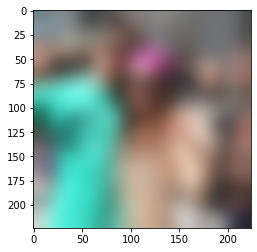

In [276]:
blurred_img = cv2.GaussianBlur(images.squeeze().cpu().permute(1, 2, 0).numpy(), (61, 61), 0)
out = torch.tensor(blurred_img)
out = out.permute(2,0,1)
out = out.unsqueeze(0)
out = invTrans(out)
plt.imshow(out.detach().cpu().squeeze().permute(1, 2, 0) )
plt.savefig('full_blur_survey.png', bbox_inches='tight',pad_inches = 0)

8


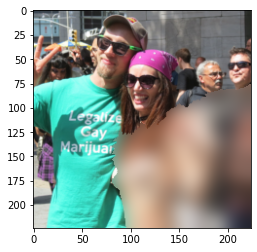

In [261]:
print(len(features_1))
total_attribution = np.zeros((299, 299))
for feature in range(len(features_1)):
    total_attribution += features_1[feature]
    
blurred = cv2.GaussianBlur(images.squeeze().cpu().permute(1, 2, 0).numpy(), (61, 61), 0)
    
mask = [total_attribution, total_attribution, total_attribution]
mask = np.array(mask)
mask = mask.transpose(1,2,0)

partial_blur = np.where(mask==np.array([0, 0, 0]), images.squeeze().cpu().permute(1, 2, 0).numpy(), blurred)

# obfuscated_image = blur_image_from_attribution(image = obfuscated_image,
#                                                        attribution_map = total_attribution)

partial_blur = torch.tensor(partial_blur)
partial_blur = partial_blur.permute(2,0,1)
partial_blur = partial_blur.unsqueeze(0)
partial_blur = invTrans(partial_blur)
plt.imshow(partial_blur.detach().cpu().squeeze().permute(1, 2, 0) )

In [65]:
for feature in range(len(features_1)):
    print(feature)

0
1
2
3
4
5
6
7


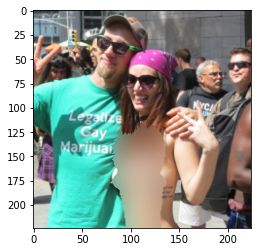

In [271]:
total_attribution = features_1[7] + features_1[4]
blurred = cv2.GaussianBlur(images.squeeze().cpu().permute(1, 2, 0).numpy(), (91, 91), 0)
    
mask = [total_attribution, total_attribution, total_attribution]
mask = np.array(mask)
mask = mask.transpose(1,2,0)

partial_blur = np.where(mask==np.array([0, 0, 0]), images.squeeze().cpu().permute(1, 2, 0).numpy(), blurred)

# obfuscated_image = blur_image_from_attribution(image = obfuscated_image,
#                                                        attribution_map = total_attribution)

partial_blur = torch.tensor(partial_blur)
partial_blur = partial_blur.permute(2,0,1)
partial_blur = partial_blur.unsqueeze(0)
partial_blur = invTrans(partial_blur)
plt.imshow(partial_blur.detach().cpu().squeeze().permute(1, 2, 0) )
plt.savefig('partial_blur_survey.png')

Predicted class:  0


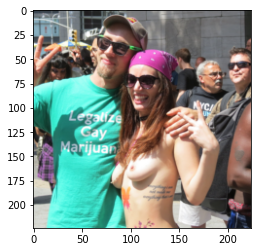

In [272]:
img = Image.open('survey_img.png')
image_to_tensor = transform_test(img).unsqueeze(0)
image_to_tensor = image_to_tensor.to(device)
images = image_to_tensor

outputs = model(image_to_tensor.to(device)).cpu()
_, predicted = outputs.max(1)
pred_val = predicted.item()
print("Predicted class: ",pred_val)
inv_tensor = invTrans(image_to_tensor)
plt.imshow( inv_tensor.detach().cpu().squeeze().permute(1, 2, 0)  )
plt.savefig('unblurred_survey.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


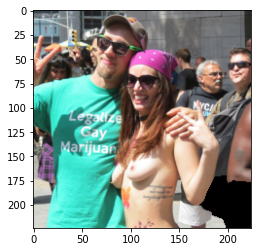

In [241]:
example_10 = get_grayscale_grad_cam(image = images)
seg = segmentation_info(image = images, num_segments = 30, compactness = 50)
avg_attr_scores = cam_processor_for_segments(grayscale_cam_output = example_10, segments_slic = seg[1])
top_attrs = attribution_ranker(cam_processor_for_segments_output = avg_attr_scores, num_top_attr = 8)
features_1 = get_feature_masks(image = images, attributions = top_attrs, segments_slic = seg[1])
ex_1 = get_image_versions(image = images, features_list = features_1, model = model, SMU_class_index = 1)
ranked = image_rankings(get_image_versions = ex_1)
plt.imshow(ranked[0][0].detach().cpu().squeeze().permute(1, 2, 0))

In [242]:
print(len(features_1))

8


Predicted class:  0


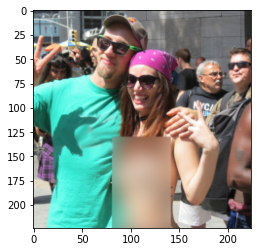

In [275]:
img = Image.open('Survey Image blurred.png').convert('RGB')
image_to_tensor = transform_test(img).unsqueeze(0)
image_to_tensor = image_to_tensor.to(device)
images = image_to_tensor

outputs = model(image_to_tensor.to(device)).cpu()
_, predicted = outputs.max(1)
pred_val = predicted.item()
print("Predicted class: ",pred_val)
inv_tensor = invTrans(image_to_tensor)
plt.imshow( inv_tensor.detach().cpu().squeeze().permute(1, 2, 0)  )
plt.savefig('partial_blur_survey.png', bbox_inches='tight',pad_inches = 0)

In [115]:
from scipy import ndimage
print(ex_1[0][4].max())
example_attribution_map = ranked[0][4]


0.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


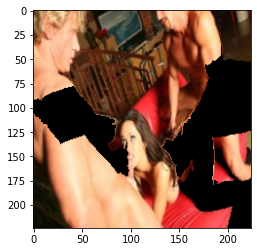

In [116]:
obfusc = blur_image_from_attribution(image = images,
                                                       attribution_map = example_attribution_map)
obfusc = obfusc.to(device)
obfusc = invTrans(obfusc)
plt.imshow( obfusc.detach().cpu().squeeze().permute(1, 2, 0)  )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


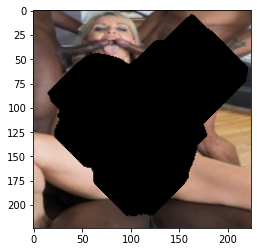

In [64]:
def obfuscation_dilation(image, attribution_map, num_dilations):
    # Takes in the original input image
    attr_map = attribution_map
    attr_map = ndimage.binary_dilation(input = attr_map, iterations = num_dilations)
    obf_image = blur_image_from_attribution(image = image,
                                            attribution_map = attr_map)
    
    logits = model(obf_image.to(device)).cpu()
    probs = F.softmax(logits, dim=1)
    probs = probs.detach().cpu()
    probs = probs.tolist()[0]
    
    while probs[1] > 0.5:
        attr_map = ndimage.binary_dilation(input = attr_map, iterations = num_dilations)
        obf_image = blur_image_from_attribution(image = image,
                                            attribution_map = attr_map)
        logits = model(obf_image.to(device)).cpu()
        probs = F.softmax(logits, dim=1)
        probs = probs.detach().cpu()
        probs = probs.tolist()[0]
    
    obf_image = invTrans(obf_image)
    
    return obf_image, attr_map, probsfrom scipy import ndimage
example_attribution_map_2 = ndimage.binary_dilation(input = example_attribution_map, iterations =30)
obfusc = blur_image_from_attribution(image = images,
                                                       attribution_map = example_attribution_map_2)
obfusc = obfusc.to(device)
obfusc = invTrans(obfusc)
plt.imshow( obfusc.detach().cpu().squeeze().permute(1, 2, 0)  )

In [117]:
ev = good_img_transform(obfusc).to(device)
logits = model(ev).cpu()
probs = F.softmax(logits, dim=1)
probs = probs.detach().cpu()
probs = probs.tolist()[0]
print(probs)

[0.05422545224428177, 0.9457745552062988]


In [16]:
def obfuscation_dilation(image, attribution_map, num_dilations):
    # Takes in the original input image
    attr_map = attribution_map
    attr_map = ndimage.binary_dilation(input = attr_map, iterations = num_dilations)
    obf_image = blur_image_from_attribution(image = image,
                                            attribution_map = attr_map)
    
    logits = model(obf_image.to(device)).cpu()
    probs = F.softmax(logits, dim=1)
    probs = probs.detach().cpu()
    probs = probs.tolist()[0]
    
    while probs[1] > 0.5:
        attr_map = ndimage.binary_dilation(input = attr_map, iterations = num_dilations)
        obf_image = blur_image_from_attribution(image = image,
                                            attribution_map = attr_map)
        logits = model(obf_image.to(device)).cpu()
        probs = F.softmax(logits, dim=1)
        probs = probs.detach().cpu()
        probs = probs.tolist()[0]
    
    obf_image = invTrans(obf_image)
    
    return obf_image, attr_map, probs

In [17]:
def obfuscation_dilation_limited(image, attribution_map, num_dilations):
    # Takes in the original input image
    attr_map = attribution_map
    attr_map = ndimage.binary_dilation(input = attr_map, iterations = num_dilations)
    obf_image = blur_image_from_attribution(image = image,
                                            attribution_map = attr_map)
    
    logits = model(obf_image.to(device)).cpu()
    probs = F.softmax(logits, dim=1)
    probs = probs.detach().cpu()
    probs = probs.tolist()[0]
    #Change probs[int] to int = SMU class index
    while probs[1] > 0.5:
        attr_map = ndimage.binary_dilation(input = attr_map, iterations = num_dilations)
        obf_image = blur_image_from_attribution(image = image,
                                            attribution_map = attr_map)
        logits = model(obf_image.to(device)).cpu()
        probs = F.softmax(logits, dim=1)
        probs = probs.detach().cpu()
        probs = probs.tolist()[0]
        
        mask_prop = np.count_nonzero(attr_map) / (299*299)
        if mask_prop > 0.5:
            break
        
        # if proportion of mask is > some value then break
    
    
    
    obf_image = invTrans(obf_image)
    
    return obf_image, attr_map, probs

[0.6033678650856018, 0.3966321647167206]
0.3966321647167206


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


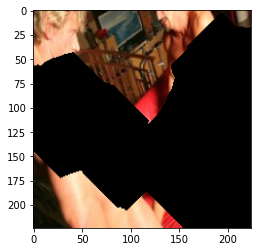

In [120]:

dil = obfuscation_dilation(image = images,
                           attribution_map = example_attribution_map,
                           num_dilations = 5)
print(dil[2])
print(dil[2][1])
plt.imshow( dil[0].detach().cpu().squeeze().permute(1, 2, 0)  )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


91.45343115611527


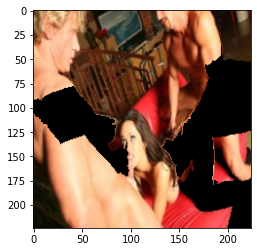

In [121]:
print(ranked[0][3])
plt.imshow(ranked[0][0].detach().cpu().squeeze().permute(1, 2, 0))

In [123]:
x1 = np.count_nonzero(dil[1])
print(x1)

31797


In [15]:

def CAM_attribution_processor(attribution, percentile):
    #attr_np = attribution.detach().squeeze().cpu().numpy()
    attr_np_sorted = np.sort(attribution, axis=None)
    #This threshold obfuscates the top 10% of attribution scores
    top_attr_score_percentile = percentile
    array_size = 299*299
    sorted_array_index = round(array_size*top_attr_score_percentile)
    threshold = attr_np_sorted[-sorted_array_index]
    
    #Convert pytorch tensor to numpy
    #threshold = attribution.mean().detach().cpu().numpy()
    #threshold = 0.05
    #Convert values greater than zero to 0 so that these don't impact the final image when the attributions are combined with the original image
    attr_final = attribution
    row_counter = 0
    column_counter = 0
    for row in attr_final:
        for cell in row:
            if cell > threshold:
                attr_final[row_counter, column_counter] = -1
                column_counter +=1
            if cell <= threshold:
                attr_final[row_counter, column_counter] = 0
                column_counter +=1
        row_counter += 1
        column_counter = 0
    # attr_final = torch.tensor(attr_final)
    # attr_final = attr_final.unsqueeze(0)
    # attr_final = attr_final.unsqueeze(0)
    return attr_final

In [17]:
example_attribution_1 = get_grayscale_grad_cam(image = images)
CAM_attr_1 =  CAM_attribution_processor(attribution = example_attribution_1, percentile = 0.20)

In [18]:
print(CAM_attr_1.shape)
print(np.count_nonzero(CAM_attr_1))

(299, 299)
17879


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.010658412240445614


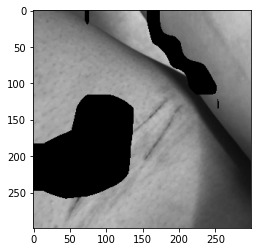

In [19]:
obfusc = blur_image_from_attribution(image = images,
                                                       attribution_map = CAM_attr_1)

logits = model(obfusc.to(device)).cpu()
probs = F.softmax(logits, dim=1)
probs = probs.detach().cpu()
probs = probs.tolist()[0]
probs = probs[1]
print(probs)
obfusc = obfusc.to(device)
obfusc = invTrans(obfusc)
plt.imshow( obfusc.detach().cpu().squeeze().permute(1, 2, 0)  )

In [ ]:
example_attribution_1 = get_grayscale_grad_cam(image = images)
CAM_attr_1 =  CAM_attribution_processor(attribution = example_attribution_1, percentile = 0.20)
obfusc = blur_image_from_attribution(image = images,
                                                       attribution_map = CAM_attr_1)
obfusc = obfusc.to(device)
obfusc = invTrans(obfusc)


example = obfusc
exam_img = good_img_transform(example)
logits = model(exam_img).cpu()
probs = F.softmax(logits, dim=1)
probs = probs.detach().cpu()
probs = probs.tolist()[0]
probs = probs[1]

num_pixels_obf = np.count_nonzero(CAM_attr_1)

In [41]:
# To test cam based masking methods
i = 0
n = 0
image_info_list = []
while i < 150:
    torch.manual_seed(0)
    testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True, num_workers=2)
    images, labels = next(itertools.islice(testloader, n, None))
    just_label = labels.item()
    
    outputs = model(images.to(device))
    _, predicted = outputs.max(1)
    predicted = predicted.cpu().item()
    #n += 1
    #print()
    #print(predicted)
    if just_label == 1 and predicted ==1:
        print('index:', n)
        i += 1
        example_attribution_1 = get_grayscale_grad_cam(image = images)
        CAM_attr_1 =  CAM_attribution_processor(attribution = example_attribution_1, percentile = 0.20)
        obfusc = blur_image_from_attribution(image = images,
                                                       attribution_map = CAM_attr_1)
        obfusc = obfusc.to(device)
        obfusc = invTrans(obfusc)


        example = obfusc
        exam_img = good_img_transform(example)
        logits = model(exam_img).cpu()
        probs = F.softmax(logits, dim=1)
        probs = probs.detach().cpu()
        probs = probs.tolist()[0]
        probs = probs[1]
        
        image_info = []
        

        image_info.append(probs)
        
        num_pixels_obf = np.count_nonzero(CAM_attr_1)
        image_info.append(num_pixels_obf)
        
        image_info_list.append(image_info)
    n += 1

index: 1
index: 3
index: 4
index: 7
index: 8
index: 9
index: 11
index: 14
index: 16
index: 20
index: 21
index: 22
index: 23
index: 24
index: 26
index: 27
index: 34
index: 35
index: 36
index: 38
index: 39
index: 44
index: 50
index: 53
index: 54
index: 55
index: 56
index: 61
index: 62
index: 70
index: 71
index: 72
index: 77
index: 79
index: 82
index: 86
index: 96
index: 99
index: 101
index: 102
index: 104
index: 107
index: 109
index: 113
index: 120
index: 122
index: 123
index: 124
index: 131
index: 133
index: 137
index: 147
index: 156
index: 160
index: 161
index: 162
index: 163
index: 167
index: 168
index: 172
index: 178
index: 180
index: 181
index: 182
index: 186
index: 189
index: 192
index: 193
index: 195
index: 200
index: 202
index: 205
index: 206
index: 211
index: 214
index: 215
index: 216
index: 220
index: 221
index: 222
index: 223
index: 225
index: 227
index: 228
index: 229
index: 235
index: 236


index: 237
index: 239
index: 241
index: 242
index: 243
index: 245
index: 249
index: 250
index: 252
index: 255
index: 256
index: 262
index: 265
index: 266
index: 267
index: 271
index: 272
index: 273
index: 277
index: 282
index: 284
index: 288
index: 290
index: 292
index: 293
index: 295
index: 298
index: 300
index: 308
index: 309
index: 311
index: 314
index: 316
index: 318
index: 319
index: 320
index: 322
index: 323
index: 325
index: 326
index: 328
index: 332
index: 335
index: 340
index: 341
index: 342
index: 344
index: 347
index: 348
index: 349
index: 351
index: 355
index: 357
index: 360
index: 363
index: 364
index: 368
index: 374
index: 379
index: 381
index: 382
index: 384
index: 387


In [42]:
success = 0
total = len(image_info_list)
total_pix = total * 299 * 299
total_obf = 0
for i in range(len(image_info_list)):
    if image_info_list[i][0] < 0.5:
        success += 1
    total_obf += image_info_list[i][1] 

print(success / total)
print(total_obf / total_pix)

0.6866666666666666
0.19998657733134975


## LIME Evaluation

In [25]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

In [26]:
# resize and take the center part of image to what our model expects
def get_input_transform():
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])       
    transf = transforms.Compose([
        transforms.Resize((320, 320)),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
        normalize
    ])    

    return transf

def get_input_tensors(img):
    transf = get_input_transform()
    # unsqeeze converts single image to batch of 1
    return transf(img).unsqueeze(0)



def get_pil_transform(): 
    transf = transforms.Compose([
        transforms.Resize((320, 320)),
        transforms.CenterCrop(299)
    ])    

    return transf

def get_preprocess_transform():
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])     
    transf = transforms.Compose([
        transforms.ToTensor(),
        normalize
    ])    

    return transf  

def batch_predict(images):
    model.eval()
    batch = torch.stack(tuple(preprocess_transform(i) for i in images), dim=0)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    batch = batch.to(device)
    
    logits = model(batch)
    probs = F.softmax(logits, dim=1)
    return probs.detach().cpu().numpy()

def black_image_from_attribution_lime(image, attribution_map):
    # attribution map is the attributions after being passed through the attribution processor
    # image is a tensor
    # will output the blurred image based on the attribution map
    
    
    #average_img = image.squeeze().cpu().permute(1, 2, 0).numpy()
    #avg = np.average(average_img)
    #blurred_img = cv2.GaussianBlur(image.squeeze().cpu().permute(1, 2, 0).numpy(), (181, 181), 0)
    avg = np.float32(-2.1179039478302)
    #avg_img = np.where(average_img > 9999, average_img, avg)
    
    #attribution_map = attribution_map.detach().squeeze().cpu().numpy()
    
    mask = [attribution_map, attribution_map, attribution_map]
    mask = np.array(mask)
    mask = mask.transpose(1,2,0)
    
    out = np.where(mask==np.array([-1, -1, -1]), image.squeeze().cpu().permute(1, 2, 0).numpy(), avg)
    #out = np.where(mask==np.array([0, 0, 0]), image.squeeze().cpu().permute(1, 2, 0).numpy(), blurred_img)
    
    out = torch.tensor(out)
    out = out.permute(2,0,1)
    out = out.unsqueeze(0)
    
    
    return out

In [27]:
def black_image_from_attribution_lime(image, attribution_map):
    # attribution map is the attributions after being passed through the attribution processor
    # image is a tensor
    # will output the blurred image based on the attribution map
    
    
    #average_img = image.squeeze().cpu().permute(1, 2, 0).numpy()
    #avg = np.average(average_img)
    #blurred_img = cv2.GaussianBlur(image.squeeze().cpu().permute(1, 2, 0).numpy(), (181, 181), 0)
    avg = np.float32(-2.1179039478302)
    #avg_img = np.where(average_img > 9999, average_img, avg)
    
    #attribution_map = attribution_map.detach().squeeze().cpu().numpy()
    
    mask = [attribution_map, attribution_map, attribution_map]
    mask = np.array(mask)
    mask = mask.transpose(1,2,0)
    
    out = np.where(mask==np.array([-1, -1, -1]), image.squeeze().cpu().permute(1, 2, 0).numpy(), avg)
    #out = np.where(mask==np.array([0, 0, 0]), image.squeeze().cpu().permute(1, 2, 0).numpy(), blurred_img)
    
    out = torch.tensor(out)
    out = out.permute(2,0,1)
    out = out.unsqueeze(0)
    
    
    return out

In [28]:
# To test LIME
i = 0
n = 0
image_info_list = []
while i < 150:
    torch.manual_seed(0)
    testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True, num_workers=2)
    images, labels = next(itertools.islice(testloader, n, None))
    just_label = labels.item()
    
    outputs = model(images.to(device))
    _, predicted = outputs.max(1)
    predicted = predicted.cpu().item()
    #n += 1
    #print()
    #print(predicted)
    if just_label == 1 and predicted ==1:
        print('index:', n)
        i += 1
        
        
        
        tensor_for_lime = invTrans(images)
        transform_to_PIL = T.ToPILImage()
        tensor_for_lime = tensor_for_lime.squeeze()
        img_for_lime = transform_to_PIL(tensor_for_lime)
        pill_transf = get_pil_transform()
        preprocess_transform = get_preprocess_transform()
        test_pred = batch_predict([img_for_lime])
        test_pred.squeeze().argmax()

        explainer = lime_image.LimeImageExplainer()
        explanation = explainer.explain_instance(np.array(img_for_lime), 
                                         batch_predict,
                                    
                                         top_labels=2, 
                                         hide_color=0,
                                         num_features = 5000,
                                         num_samples=100)

        temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=224, hide_rest=False)
        
        lime_img_output = black_image_from_attribution_lime(image = tensor_for_lime, attribution_map = mask)
        model.eval()
        lime_img_output_for_model = good_img_transform(lime_img_output).to(device)
        
        logits = model(lime_img_output_for_model).cpu()
        probs = F.softmax(logits, dim=1)
        probs = probs.detach().cpu()
        probs = probs.tolist()[0]
        probs = probs[1]
        #Change probs[int] to int = SMU class index
        image_info = []
        
        image_info.append(probs)
        num_pixels_obf = np.count_nonzero(mask == 1)
        image_info.append(num_pixels_obf)
        image_info_list.append(image_info)
        
        
    n += 1

index: 1


  0%|          | 0/100 [00:00<?, ?it/s]

index: 3


  0%|          | 0/100 [00:00<?, ?it/s]

index: 4


  0%|          | 0/100 [00:00<?, ?it/s]

index: 7


  0%|          | 0/100 [00:00<?, ?it/s]

index: 8


  0%|          | 0/100 [00:00<?, ?it/s]

index: 9


  0%|          | 0/100 [00:00<?, ?it/s]

index: 11


  0%|          | 0/100 [00:00<?, ?it/s]

index: 14


  0%|          | 0/100 [00:00<?, ?it/s]

index: 16


  0%|          | 0/100 [00:00<?, ?it/s]

index: 20


  0%|          | 0/100 [00:00<?, ?it/s]

index: 21


  0%|          | 0/100 [00:00<?, ?it/s]

index: 22


  0%|          | 0/100 [00:00<?, ?it/s]

index: 23


  0%|          | 0/100 [00:00<?, ?it/s]

index: 24


  0%|          | 0/100 [00:00<?, ?it/s]

index: 26


  0%|          | 0/100 [00:00<?, ?it/s]

index: 27


  0%|          | 0/100 [00:00<?, ?it/s]

index: 34


  0%|          | 0/100 [00:00<?, ?it/s]

index: 35


  0%|          | 0/100 [00:00<?, ?it/s]

index: 36


  0%|          | 0/100 [00:00<?, ?it/s]

index: 38


  0%|          | 0/100 [00:00<?, ?it/s]

index: 39


  0%|          | 0/100 [00:00<?, ?it/s]

index: 44


  0%|          | 0/100 [00:00<?, ?it/s]

index: 50


  0%|          | 0/100 [00:00<?, ?it/s]

index: 53


  0%|          | 0/100 [00:00<?, ?it/s]

index: 54


  0%|          | 0/100 [00:00<?, ?it/s]

index: 55


  0%|          | 0/100 [00:00<?, ?it/s]

index: 56


  0%|          | 0/100 [00:00<?, ?it/s]

index: 61


  0%|          | 0/100 [00:00<?, ?it/s]

index: 62


  0%|          | 0/100 [00:00<?, ?it/s]

index: 70


  0%|          | 0/100 [00:00<?, ?it/s]

index: 71


  0%|          | 0/100 [00:00<?, ?it/s]

index: 72


  0%|          | 0/100 [00:00<?, ?it/s]

index: 77


  0%|          | 0/100 [00:00<?, ?it/s]

index: 79


  0%|          | 0/100 [00:00<?, ?it/s]

index: 82


  0%|          | 0/100 [00:00<?, ?it/s]

index: 86


  0%|          | 0/100 [00:00<?, ?it/s]

index: 96


  0%|          | 0/100 [00:00<?, ?it/s]

index: 99


  0%|          | 0/100 [00:00<?, ?it/s]

index: 101


  0%|          | 0/100 [00:00<?, ?it/s]

index: 102


  0%|          | 0/100 [00:00<?, ?it/s]

index: 104


  0%|          | 0/100 [00:00<?, ?it/s]

index: 107


  0%|          | 0/100 [00:00<?, ?it/s]

index: 109


  0%|          | 0/100 [00:00<?, ?it/s]

index: 113


  0%|          | 0/100 [00:00<?, ?it/s]

index: 120


  0%|          | 0/100 [00:00<?, ?it/s]

index: 122


  0%|          | 0/100 [00:00<?, ?it/s]

index: 123


  0%|          | 0/100 [00:00<?, ?it/s]

index: 124


  0%|          | 0/100 [00:00<?, ?it/s]

index: 131


  0%|          | 0/100 [00:00<?, ?it/s]

index: 133


  0%|          | 0/100 [00:00<?, ?it/s]

index: 137


  0%|          | 0/100 [00:00<?, ?it/s]

index: 147


  0%|          | 0/100 [00:00<?, ?it/s]

index: 156


  0%|          | 0/100 [00:00<?, ?it/s]

index: 160


  0%|          | 0/100 [00:00<?, ?it/s]

index: 161


  0%|          | 0/100 [00:00<?, ?it/s]

index: 162


  0%|          | 0/100 [00:00<?, ?it/s]

index: 163


  0%|          | 0/100 [00:00<?, ?it/s]

index: 167


  0%|          | 0/100 [00:00<?, ?it/s]

index: 168


  0%|          | 0/100 [00:00<?, ?it/s]

index: 172


  0%|          | 0/100 [00:00<?, ?it/s]

index: 178


  0%|          | 0/100 [00:00<?, ?it/s]

index: 180


  0%|          | 0/100 [00:00<?, ?it/s]

index: 181


  0%|          | 0/100 [00:00<?, ?it/s]

index: 182


  0%|          | 0/100 [00:00<?, ?it/s]

index: 186


  0%|          | 0/100 [00:00<?, ?it/s]

index: 189


  0%|          | 0/100 [00:00<?, ?it/s]

index: 192


  0%|          | 0/100 [00:00<?, ?it/s]

index: 193


  0%|          | 0/100 [00:00<?, ?it/s]

index: 195


  0%|          | 0/100 [00:00<?, ?it/s]

index: 200


  0%|          | 0/100 [00:00<?, ?it/s]

index: 202


  0%|          | 0/100 [00:00<?, ?it/s]

index: 205


  0%|          | 0/100 [00:00<?, ?it/s]

index: 206


  0%|          | 0/100 [00:00<?, ?it/s]

index: 211


  0%|          | 0/100 [00:00<?, ?it/s]

index: 214


  0%|          | 0/100 [00:00<?, ?it/s]

index: 215


  0%|          | 0/100 [00:00<?, ?it/s]

index: 216


  0%|          | 0/100 [00:00<?, ?it/s]

index: 220


  0%|          | 0/100 [00:00<?, ?it/s]

index: 221


  0%|          | 0/100 [00:00<?, ?it/s]

index: 222


  0%|          | 0/100 [00:00<?, ?it/s]

index: 223


  0%|          | 0/100 [00:00<?, ?it/s]

index: 225


  0%|          | 0/100 [00:00<?, ?it/s]

index: 227


  0%|          | 0/100 [00:00<?, ?it/s]

index: 228


  0%|          | 0/100 [00:00<?, ?it/s]

index: 229


  0%|          | 0/100 [00:00<?, ?it/s]

index: 235


  0%|          | 0/100 [00:00<?, ?it/s]

index: 236


  0%|          | 0/100 [00:00<?, ?it/s]

index: 237


  0%|          | 0/100 [00:00<?, ?it/s]

index: 239


  0%|          | 0/100 [00:00<?, ?it/s]

index: 241


  0%|          | 0/100 [00:00<?, ?it/s]

index: 242


  0%|          | 0/100 [00:00<?, ?it/s]

index: 243


  0%|          | 0/100 [00:00<?, ?it/s]

index: 245


  0%|          | 0/100 [00:00<?, ?it/s]

index: 249


  0%|          | 0/100 [00:00<?, ?it/s]

index: 250


  0%|          | 0/100 [00:00<?, ?it/s]

index: 252


  0%|          | 0/100 [00:00<?, ?it/s]

index: 255


  0%|          | 0/100 [00:00<?, ?it/s]

index: 256


  0%|          | 0/100 [00:00<?, ?it/s]

index: 262


  0%|          | 0/100 [00:00<?, ?it/s]

index: 265


  0%|          | 0/100 [00:00<?, ?it/s]

index: 266


  0%|          | 0/100 [00:00<?, ?it/s]

index: 267


  0%|          | 0/100 [00:00<?, ?it/s]

index: 271


  0%|          | 0/100 [00:00<?, ?it/s]

index: 272


  0%|          | 0/100 [00:00<?, ?it/s]

index: 273


  0%|          | 0/100 [00:00<?, ?it/s]

index: 277


  0%|          | 0/100 [00:00<?, ?it/s]

index: 282


  0%|          | 0/100 [00:00<?, ?it/s]

index: 284


  0%|          | 0/100 [00:00<?, ?it/s]

index: 288


  0%|          | 0/100 [00:00<?, ?it/s]

index: 290


  0%|          | 0/100 [00:00<?, ?it/s]

index: 292


  0%|          | 0/100 [00:00<?, ?it/s]

index: 293


  0%|          | 0/100 [00:00<?, ?it/s]

index: 295


  0%|          | 0/100 [00:00<?, ?it/s]

index: 298


  0%|          | 0/100 [00:00<?, ?it/s]

index: 300


  0%|          | 0/100 [00:00<?, ?it/s]

index: 308


  0%|          | 0/100 [00:00<?, ?it/s]

index: 309


  0%|          | 0/100 [00:00<?, ?it/s]

index: 311


  0%|          | 0/100 [00:00<?, ?it/s]

index: 314


  0%|          | 0/100 [00:00<?, ?it/s]

index: 316


  0%|          | 0/100 [00:00<?, ?it/s]

index: 318


  0%|          | 0/100 [00:00<?, ?it/s]

index: 319


  0%|          | 0/100 [00:00<?, ?it/s]

index: 320


  0%|          | 0/100 [00:00<?, ?it/s]

index: 322


  0%|          | 0/100 [00:00<?, ?it/s]

index: 323


  0%|          | 0/100 [00:00<?, ?it/s]

index: 325


  0%|          | 0/100 [00:00<?, ?it/s]

index: 326


  0%|          | 0/100 [00:00<?, ?it/s]

index: 328


  0%|          | 0/100 [00:00<?, ?it/s]

index: 332


  0%|          | 0/100 [00:00<?, ?it/s]

index: 335


  0%|          | 0/100 [00:00<?, ?it/s]

index: 340


  0%|          | 0/100 [00:00<?, ?it/s]

index: 341


  0%|          | 0/100 [00:00<?, ?it/s]

index: 342


  0%|          | 0/100 [00:00<?, ?it/s]

index: 344


  0%|          | 0/100 [00:00<?, ?it/s]

index: 347


  0%|          | 0/100 [00:00<?, ?it/s]

index: 348


  0%|          | 0/100 [00:00<?, ?it/s]

index: 349


  0%|          | 0/100 [00:00<?, ?it/s]

index: 351


  0%|          | 0/100 [00:00<?, ?it/s]

index: 355


  0%|          | 0/100 [00:00<?, ?it/s]

index: 357


  0%|          | 0/100 [00:00<?, ?it/s]

index: 360


  0%|          | 0/100 [00:00<?, ?it/s]

index: 363


  0%|          | 0/100 [00:00<?, ?it/s]

index: 364


  0%|          | 0/100 [00:00<?, ?it/s]

index: 368


  0%|          | 0/100 [00:00<?, ?it/s]

index: 374


  0%|          | 0/100 [00:00<?, ?it/s]

index: 379


  0%|          | 0/100 [00:00<?, ?it/s]

index: 381


  0%|          | 0/100 [00:00<?, ?it/s]

index: 382


  0%|          | 0/100 [00:00<?, ?it/s]

index: 384


  0%|          | 0/100 [00:00<?, ?it/s]

index: 387


  0%|          | 0/100 [00:00<?, ?it/s]

In [29]:
success = 0
total = len(image_info_list)
total_pix = total * 299 * 299
total_obf = 0
for i in range(len(image_info_list)):
    if image_info_list[i][0] < 0.5:
        success += 1
    total_obf += image_info_list[i][1] 

print(success / total)
print(total_obf / total_pix)

1.0
0.7689758130967961


Predicted class:  0


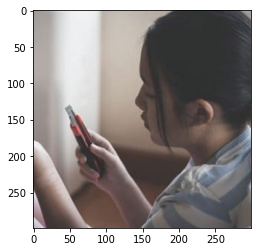

In [16]:
img = Image.open('Algorithm Steps/SH/self_harm.jpg')
image_to_tensor = transform_test(img).unsqueeze(0)
image_to_tensor = image_to_tensor.to(device)
images = image_to_tensor

outputs = model(image_to_tensor.to(device)).cpu()
_, predicted = outputs.max(1)
pred_val = predicted.item()
print("Predicted class: ",pred_val)
inv_tensor = invTrans(image_to_tensor)
plt.imshow( inv_tensor.detach().cpu().squeeze().permute(1, 2, 0)  )
#plt.savefig('unblurred_survey.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


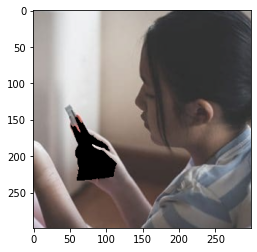

In [20]:
example_10 = get_grayscale_grad_cam(image = images)
seg = segmentation_info(image = images, num_segments = 30, compactness = 50)
avg_attr_scores = cam_processor_for_segments(grayscale_cam_output = example_10, segments_slic = seg[1])
top_attrs = attribution_ranker(cam_processor_for_segments_output = avg_attr_scores, num_top_attr = 10)
top_attrs = [22,21,20,19,18,17,16,15,14,13]
features_1 = get_feature_masks(image = images, attributions = top_attrs, segments_slic = seg[1])
ex_1 = get_image_versions(image = images, features_list = features_1, model = model, SMU_class_index = 1)
ranked = image_rankings(get_image_versions = ex_1)
plt.imshow(ranked[0][0].detach().cpu().squeeze().permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1024
0.036751833749926445
3282
89401
tensor(-2.1179, device='cuda:0')
[0.9999591112136841, 4.0834991523297504e-05]
4.0834991523297504e-05


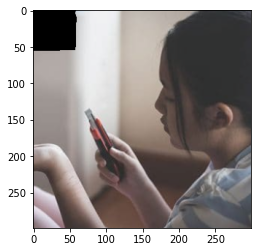

In [16]:
print(len(ranked))
index = 0
example = ranked[index][0]
print(ranked[index][3])
print(ranked[index][1])
print(ranked[index][2])
exam_img = good_img_transform(example)
print(exam_img.min())
logits = model(exam_img).cpu()
probs = F.softmax(logits, dim=1)
probs = probs.detach().cpu()
probs = probs.tolist()[0]
print(probs)
print(probs[1])
plt.imshow( example.detach().cpu().squeeze().permute(1, 2, 0)  )

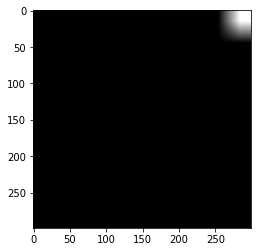

In [36]:
from pytorch_grad_cam import FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
input_tensor = images.to(device)
targets = [ClassifierOutputTarget(1)]
target_layers = [model.layer4[-1]]
cam = GradCAM(model=model, target_layers=target_layers)
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
grayscale_cam = grayscale_cam[0, :]
#visualization = show_cam_on_image(input_tensor, grayscale_cam, use_rgb=T
plt.imshow(grayscale_cam, cmap='gray', vmin=0, vmax=1)

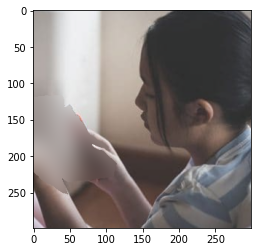

In [31]:
total_attribution =  features_1[2] +   features_1[6] +  features_1[8]  
blurred = cv2.GaussianBlur(images.squeeze().cpu().permute(1, 2, 0).numpy(), (91, 91), 0)
    
mask = [total_attribution, total_attribution, total_attribution]
mask = np.array(mask)
mask = mask.transpose(1,2,0)

partial_blur = np.where(mask==np.array([0, 0, 0]), images.squeeze().cpu().permute(1, 2, 0).numpy(), blurred)

# obfuscated_image = blur_image_from_attribution(image = obfuscated_image,
#                                                        attribution_map = total_attribution)

partial_blur = torch.tensor(partial_blur)
partial_blur = partial_blur.permute(2,0,1)
partial_blur = partial_blur.unsqueeze(0)
partial_blur = invTrans(partial_blur)
plt.imshow(partial_blur.detach().cpu().squeeze().permute(1, 2, 0) )

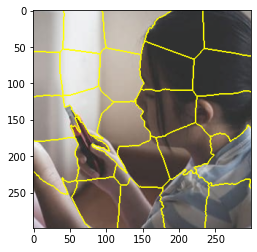

In [24]:
inv_img = invTrans(images)
img_np = inv_img.detach().cpu().squeeze().permute(1, 2, 0).numpy()
#plt.imshow(img_np)
# compactness=50
segments_slic = slic(img_np, n_segments=30, compactness=50,
                     start_label=1)
plt.imshow(segmentation.mark_boundaries(img_np, segments_slic))

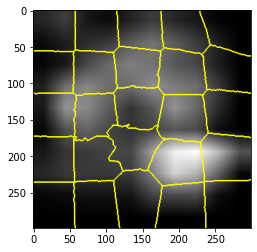

In [21]:
plt.imshow(segmentation.mark_boundaries(grayscale_cam, segments_slic))

In [ ]:
with np.printoptions(threshold=np.inf):
    print(seg[1])

In [26]:
def get_grayscale_grad_cam(image):
    input_tensor = image.to(device)
    targets = [ClassifierOutputTarget(1)]
    #target_layers = [model.layer4[-1]]
    target_layers = [model.layer4[-1]]
    cam = GradCAM(model=model, target_layers=target_layers)
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
    grayscale_cam = grayscale_cam[0, :]
    
    return(grayscale_cam)

In [13]:
# To test our algorithm with no region dilation (9 regions)
i = 0
n = 0
image_info_list = []
while i < 150:
    torch.manual_seed(0)
    testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True, num_workers=2)
    images, labels = next(itertools.islice(testloader, n, None))
    just_label = labels.item()
    
    outputs = model(images.to(device))
    _, predicted = outputs.max(1)
    predicted = predicted.cpu().item()
    #n += 1
    #print()
    #print(predicted)
    if just_label == 1 and predicted ==1:
        print('index:', n)
        i += 1
        
        example_10 = get_grayscale_grad_cam(image = images)
        seg = segmentation_info(image = images, num_segments = 30, compactness = 50)
        avg_attr_scores = cam_processor_for_segments(grayscale_cam_output = example_10, segments_slic = seg[1])
        top_attrs = attribution_ranker(cam_processor_for_segments_output = avg_attr_scores, num_top_attr = 9)
        features_1 = get_feature_masks(image = images, attributions = top_attrs, segments_slic = seg[1])
        ex_1 = get_image_versions(image = images, features_list = features_1, model = model, SMU_class_index = 1)
        ranked = image_rankings(get_image_versions = ex_1)
        
        
        image_info = []
        
        example = ranked[0][0]
        exam_img = good_img_transform(example)
        logits = model(exam_img).cpu()
        probs = F.softmax(logits, dim=1)
        probs = probs.detach().cpu()
        probs = probs.tolist()[0]
        probs = probs[1]
        image_info.append(probs)
        
        num_pixels_obf = ranked[0][1]
        image_info.append(num_pixels_obf)
        
        image_info_list.append(image_info)
    n += 1

index: 1
index: 3
index: 4
index: 7
index: 8
index: 9
index: 11
index: 14
index: 16
index: 20
index: 21
index: 22
index: 23
index: 24
index: 26
index: 27
index: 34
index: 35
index: 36
index: 38
index: 39
index: 44
index: 50
index: 53
index: 54
index: 55
index: 56
index: 61
index: 62
index: 70
index: 71
index: 72
index: 77
index: 79
index: 82
index: 86
index: 96
index: 99
index: 101
index: 102
index: 104
index: 107
index: 109
index: 113
index: 120
index: 122
index: 123
index: 124
index: 131
index: 133
index: 137
index: 147
index: 156
index: 160
index: 161
index: 162
index: 163
index: 167
index: 168
index: 172
index: 178
index: 180
index: 181
index: 182
index: 186
index: 189
index: 192
index: 193
index: 195
index: 200
index: 202
index: 205
index: 206
index: 211
index: 214
index: 215
index: 216
index: 220
index: 221
index: 222
index: 223
index: 225
index: 227
index: 228
index: 229
index: 235
index: 236
index: 237
index: 239
index: 241
index: 242
index: 243
index: 245
index: 249
index: 250

In [14]:
success = 0
total = len(image_info_list)
total_pix = total * 299 * 299
total_obf = 0
for i in range(len(image_info_list)):
    if image_info_list[i][0] < 0.5:
        success += 1
    total_obf += image_info_list[i][1] 

print(success / total)
print(total_obf / total_pix)

0.9266666666666666
0.10860079864878469


In [15]:
# To test our algorithm with no region dilation (7 regions)
i = 0
n = 0
image_info_list = []
while i < 150:
    torch.manual_seed(0)
    testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True, num_workers=2)
    images, labels = next(itertools.islice(testloader, n, None))
    just_label = labels.item()
    
    outputs = model(images.to(device))
    _, predicted = outputs.max(1)
    predicted = predicted.cpu().item()
    #n += 1
    #print()
    #print(predicted)
    if just_label == 1 and predicted ==1:
        print('index:', n)
        i += 1
        
        example_10 = get_grayscale_grad_cam(image = images)
        seg = segmentation_info(image = images, num_segments = 30, compactness = 50)
        avg_attr_scores = cam_processor_for_segments(grayscale_cam_output = example_10, segments_slic = seg[1])
        top_attrs = attribution_ranker(cam_processor_for_segments_output = avg_attr_scores, num_top_attr = 7)
        features_1 = get_feature_masks(image = images, attributions = top_attrs, segments_slic = seg[1])
        ex_1 = get_image_versions(image = images, features_list = features_1, model = model, SMU_class_index = 1)
        ranked = image_rankings(get_image_versions = ex_1)
        
        
        image_info = []
        
        example = ranked[0][0]
        exam_img = good_img_transform(example)
        logits = model(exam_img).cpu()
        probs = F.softmax(logits, dim=1)
        probs = probs.detach().cpu()
        probs = probs.tolist()[0]
        probs = probs[1]
        image_info.append(probs)
        
        num_pixels_obf = ranked[0][1]
        image_info.append(num_pixels_obf)
        
        image_info_list.append(image_info)
    n += 1

index: 1
index: 3
index: 4
index: 7
index: 8
index: 9
index: 11
index: 14
index: 16
index: 20
index: 21
index: 22
index: 23
index: 24
index: 26
index: 27
index: 34
index: 35
index: 36
index: 38
index: 39
index: 44
index: 50
index: 53
index: 54
index: 55
index: 56
index: 61
index: 62
index: 70
index: 71
index: 72
index: 77
index: 79
index: 82
index: 86
index: 96
index: 99
index: 101
index: 102
index: 104
index: 107
index: 109
index: 113
index: 120
index: 122
index: 123
index: 124
index: 131
index: 133
index: 137
index: 147
index: 156
index: 160
index: 161
index: 162
index: 163
index: 167
index: 168
index: 172
index: 178
index: 180
index: 181
index: 182
index: 186
index: 189
index: 192
index: 193
index: 195
index: 200
index: 202
index: 205
index: 206
index: 211
index: 214
index: 215
index: 216
index: 220
index: 221
index: 222
index: 223
index: 225
index: 227
index: 228
index: 229
index: 235
index: 236
index: 237
index: 239
index: 241
index: 242
index: 243
index: 245
index: 249
index: 250

In [16]:
success = 0
total = len(image_info_list)
total_pix = total * 299 * 299
total_obf = 0
for i in range(len(image_info_list)):
    if image_info_list[i][0] < 0.5:
        success += 1
    total_obf += image_info_list[i][1] 

print(success / total)
print(total_obf / total_pix)

0.82
0.10594072400383292


In [17]:
# To test our algorithm with no region dilation (5 regions)
i = 0
n = 0
image_info_list = []
while i < 150:
    torch.manual_seed(0)
    testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True, num_workers=2)
    images, labels = next(itertools.islice(testloader, n, None))
    just_label = labels.item()
    
    outputs = model(images.to(device))
    _, predicted = outputs.max(1)
    predicted = predicted.cpu().item()
    #n += 1
    #print()
    #print(predicted)
    if just_label == 1 and predicted ==1:
        print('index:', n)
        i += 1
        
        example_10 = get_grayscale_grad_cam(image = images)
        seg = segmentation_info(image = images, num_segments = 30, compactness = 50)
        avg_attr_scores = cam_processor_for_segments(grayscale_cam_output = example_10, segments_slic = seg[1])
        top_attrs = attribution_ranker(cam_processor_for_segments_output = avg_attr_scores, num_top_attr = 5)
        features_1 = get_feature_masks(image = images, attributions = top_attrs, segments_slic = seg[1])
        ex_1 = get_image_versions(image = images, features_list = features_1, model = model, SMU_class_index = 1)
        ranked = image_rankings(get_image_versions = ex_1)
        
        
        image_info = []
        
        example = ranked[0][0]
        exam_img = good_img_transform(example)
        logits = model(exam_img).cpu()
        probs = F.softmax(logits, dim=1)
        probs = probs.detach().cpu()
        probs = probs.tolist()[0]
        probs = probs[1]
        image_info.append(probs)
        
        num_pixels_obf = ranked[0][1]
        image_info.append(num_pixels_obf)
        
        image_info_list.append(image_info)
    n += 1

index: 1
index: 3
index: 4
index: 7
index: 8
index: 9
index: 11
index: 14
index: 16
index: 20
index: 21
index: 22
index: 23
index: 24
index: 26
index: 27
index: 34
index: 35
index: 36
index: 38
index: 39
index: 44
index: 50
index: 53
index: 54
index: 55
index: 56
index: 61
index: 62
index: 70
index: 71
index: 72
index: 77
index: 79
index: 82
index: 86
index: 96
index: 99
index: 101
index: 102
index: 104
index: 107
index: 109
index: 113
index: 120
index: 122
index: 123
index: 124
index: 131
index: 133
index: 137
index: 147
index: 156
index: 160
index: 161
index: 162
index: 163
index: 167
index: 168
index: 172
index: 178
index: 180
index: 181
index: 182
index: 186
index: 189
index: 192
index: 193
index: 195
index: 200
index: 202
index: 205
index: 206
index: 211
index: 214
index: 215
index: 216
index: 220
index: 221
index: 222
index: 223
index: 225
index: 227
index: 228
index: 229
index: 235
index: 236
index: 237
index: 239
index: 241
index: 242
index: 243
index: 245
index: 249
index: 250

In [18]:
success = 0
total = len(image_info_list)
total_pix = total * 299 * 299
total_obf = 0
for i in range(len(image_info_list)):
    if image_info_list[i][0] < 0.5:
        success += 1
    total_obf += image_info_list[i][1] 

print(success / total)
print(total_obf / total_pix)

0.7
0.09390014280228036
